# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).


# 图像分类

在该项目中，你将会对来自 [CIFAR-10 数据集](https://www.cs.toronto.edu/~kriz/cifar.html) 中的图像进行分类。数据集中图片的内容包括飞机（airplane）、狗（dogs）、猫（cats）及其他物体。你需要处理这些图像，接着对所有的样本训练一个卷积神经网络。

具体而言，在项目中你要对图像进行正规化处理（normalization)，同时还要对图像的标签进行 one-hot 编码。接着你将会应用到你所学的技能来搭建一个具有卷积层、最大池化（Max Pooling）层、Dropout  层及全连接（fully connected）层的神经网络。最后，你会训练你的神经网络，会得到你神经网络在样本图像上的预测结果。

## 下载数据

运行如下代码下载 [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)。

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

## 探索数据集


为防止在运行过程中内存不足的问题，该数据集已经事先被分成了5批（batch），名为`data_batch_1`、`data_batch_2`等。每一批中都含有 *图像* 及对应的 *标签*，都是如下类别中的一种：

* 飞机
* 汽车
* 鸟
* 鹿
* 狗
* 青蛙
* 马
* 船
* 卡车

理解数据集也是对数据进行预测的一部分。修改如下代码中的 `batch_id` 和 `sample_id`，看看输出的图像是什么样子。其中，`batch_id` 代表着批次数（1-5），`sample_id` 代表着在该批内图像及标签的编号。

你可以尝试回答如下问题：
* 可能出现的 *标签* 都包括哪些？
* 图像数据的取值范围是多少？
* *标签* 的排列顺序是随机的还是有序的？

对这些问题的回答，会有助于更好地处理数据，并能更好地进行预测。

### 回答：
- 可能出现的标签包括batch_id, sample_id以及图像名称。
- 色彩范围：0-255。
- 标签的排列应该是随机的。


Stats of batch 5:
Samples: 10000
Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Example of Image 9999:
Image - Min Value: 4 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


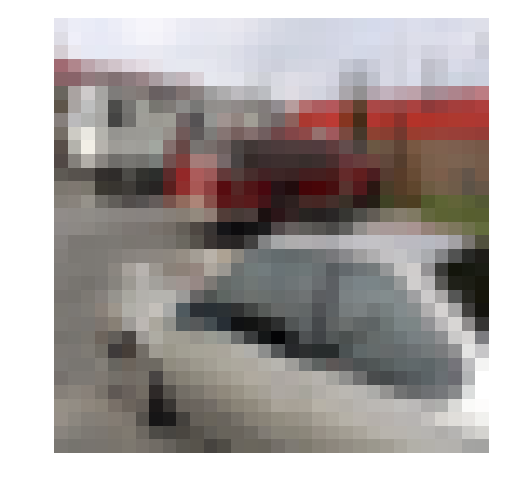

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 5
sample_id = 9999
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

## 图像预处理功能的实现
### 正规化

在如下的代码中，修改 `normalize` 函数，使之能够对输入的图像数据 `x` 进行处理，输出一个经过正规化的、Numpy array 格式的图像数据。

**注意：**
处理后的值应当在 $[0,1]$ 的范围之内。返回值应当和输入值具有相同的形状。

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    # 正则化不需要用到tensorflow,使用numpy即可
    return x / (np.max(x)-np.min(x))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

### One-hot 编码

在如下代码中，你将继续实现预处理的功能，实现一个 `one_hot_encode` 函数。函数的输入 `x` 是 *标签* 构成的列表，返回值是经过 One_hot 处理过后的这列 *标签* 对应的 One_hot 编码，以 Numpy array 储存。其中，*标签* 的取值范围从0到9。每次调用该函数时，对相同的标签值，它输出的编码也是相同的。请确保在函数外保存编码的映射（map of encodings）。

**提示：**

你可以尝试使用 sklearn preprocessing 模块中的 `LabelBinarizer` 函数。

In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(range(10))

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    return lb.transform(x)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

### 随机打乱数据

正如你在上方探索数据部分所看到的，样本的顺序已经被随机打乱了。尽管再随机处理一次也没问题，不过对于该数据我们没必要再进行一次相关操作了。

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

## 对所有图像数据进行预处理并保存结果

运行如下代码，它将会预处理所有的 CIFAR-10 数据并将它另存为文件。此外，如下的代码还将会把 10% 的训练数据留出作为验证数据。

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

# 检查点

这是你的首个检查点。因为预处理完的数据已经被保存到硬盘上了，所以如果你需要回顾或重启该 notebook，你可以在这里重新开始。

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

## 搭建神经网络

为搭建神经网络，你需要将搭建每一层的过程封装到一个函数中。大部分的代码你在函数外已经见过。为能够更透彻地测试你的代码，我们要求你把每一层都封装到一个函数中。这能够帮助我们给予你更好的回复，同时还能让我们使用 unittests 在你提交报告前检测出你项目中的小问题。

>**注意：** 如果你时间紧迫，那么在该部分我们为你提供了一个便捷方法。在接下来的一些问题中，你可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来搭建各层，不过不可以用他们搭建卷积-最大池化层。TF Layers 和 Keras 及 TFLean 中对层的抽象比较相似，所以你应该很容易上手。

>


However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

不过，如果你希望能够更多地实践，我们希望你能够在**不**使用 TF Layers 的情况下解决所有问题。你依然**能**使用来自其他包但和 layers 中重名的函数。例如，你可以使用 TF Neural Network 版本的 `conv_2d

让我们开始吧！

### 输入

神经网络需要能够读取图像数据、经 one-hot 编码之后的标签及 dropout 中的保留概率。修改如下函数：

* 修改 `neural_net_image_input` 函数：
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)。
 * 使用 `image_shape` 设定形状，设定批大小（batch size)为 `None`。
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 `Name` 参数，命名该 TensorFlow placeholder 为 "x"。
* 修改 `neural_net_label_input` 函数： 
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)。
 * 使用 `n_classes` 设定形状，设定批大小（batch size)为 `None`。
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 `Name` 参数，命名该 TensorFlow placeholder 为 "y"。
* 修改 `neural_net_keep_prob_input` 函数：
 * 返回 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 作为 dropout 的保留概率（keep probability）。
 * 使用 [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) 中的 `Name` 参数，命名该 TensorFlow placeholder 为 "keep_prob"。
 
我们会在项目最后使用这些名字，来载入你储存的模型。

**注意：**在 TensorFlow 中，对形状设定为 `None`，能帮助设定一个动态的大小。

In [7]:
import tensorflow as tf

batch_size = None

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[batch_size, image_shape[0], image_shape[1], image_shape[2]], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[batch_size, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

### 卷积-最大池（Convolution and Max Pooling）化层

卷积层在图像处理中取得了不小的成功。在这部分的代码中，你需要修改 `conv2d_maxpool` 函数来先后实现卷积及最大池化的功能。

* 使用 `conv_ksize`、`conv_num_outputs` 及 `x_tensor` 来创建权重（weight）及偏差（bias）变量。
* 对 `x_tensor` 进行卷积，使用 `conv_strides` 及*权重*。
 * 我们建议使用 SAME padding，不过你也可尝试其他 padding 模式。 
* 加上*偏差*。
* 对卷积结果加上一个非线性函数作为激活层。
* 基于 `pool_kszie` 及 `pool_strides` 进行最大池化。
 * 我们建议使用 SAME padding，不过你也可尝试其他 padding 模式。
 
**注意：**
你**不**可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来实现**这一层**的功能。但是你可以使用 TensorFlow 的[Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn)包。

对于如上的快捷方法，你在**其他层**中可以尝试使用。


**提示：**
当你在 Python 中希望展开（unpacking）某个变量的值作为函数的参数，你可以参考 [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) 运算符。

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    padding = 'SAME'
      
    # color channels
    color_channels = int(x_tensor.shape[3])
    
    # calculate weight and bias
    weight = tf.Variable(tf.truncated_normal([*conv_ksize, color_channels, conv_num_outputs]))
    bias = tf.Variable(tf.zeros(conv_num_outputs))

    # converlutional layer
    x_in = x_tensor  
    c_strides = [1, *conv_strides, 1]
    
    conv_layer = tf.nn.conv2d(x_in, weight, c_strides, padding)
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = tf.nn.sigmoid(conv_layer)

    # pooling layer
    p_ksize = [1, *pool_ksize, 1]
    p_strides = [1, *pool_strides, 1]
    pool = tf.nn.max_pool(conv_layer, p_ksize, p_strides, padding)
    return pool

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

### 展开层

修改 `flatten` 函数，来将4维的输入张量 `x_tensor` 转换为一个二维的张量。输出的形状应当是 `(Batch Size, Flattened Image Size)`。
快捷方法：你可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来实现该功能。不过你也可以只使用 TensorFlow 包中的函数来挑战自己。

In [9]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

### 全连接层

修改 `fully_conn` 函数，来对形如 `(batch Size, num_outputs)` 的输入 `x_tensor` 应用一个全连接层。快捷方法：你可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来实现该功能。不过你也可以只使用 TensorFlow 包中的函数来挑战自己。

In [10]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias 
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

### 输出层

修改 `output` 函数，来对形如 `(batch Size, num_outputs)` 的输入 `x_tensor` 应用一个全连接层。快捷方法：你可以使用来自 [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) 或 [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) 包中的函数来实现该功能。不过你也可以只使用 TensorFlow 包中的函数来挑战自己。

**注意：**
激活函数、softmax 或者交叉熵（corss entropy）**不**应被加入到该层。

In [11]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.linear(x_tensor, num_outputs)
#     return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=tf.sigmoid)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

### 创建卷积模型

修改 `conv_net` 函数，使之能够生成一个卷积神经网络模型。该函数的输入为一批图像数据 `x`，输出为 logits。在函数中，使用上方你修改的创建各种层的函数来创建该模型：

* 使用 1 到 3 个卷积-最大池化层
* 使用一个展开层
* 使用 1 到 3 个全连接层
* 使用一个输出层
* 返回呼出结果
* 在一个或多个层上使用 [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout)，对应的保留概率为 `keep_prob`. 

In [12]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    x_tensor = x
    
    pool_ksize = (2,2)
    pool_strides = (1,1)
    
    # Conv_layer 1
    conv_ksize = (4,4)
    conv_strides = (2,2)
    conv_num_outputs = 12    
    conv_layer = conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Conv_layer 2
    conv_ksize = (3,3)
    conv_strides = (1,1)
    conv_num_outputs = 48    
    conv_layer = conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Conv_layer 3
    conv_ksize = (2,2)
    conv_strides = (2,2)
    conv_num_outputs = 192    
    conv_layer = conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
        

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flat_layer = flatten(conv_layer)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # fully_conn_layer 1
    num_outputs = 1024
    fully_conn_layer = tf.nn.dropout(flat_layer, keep_prob)
    fully_conn_layer =  fully_conn(fully_conn_layer, num_outputs)
    
    # fully_conn_layer 2
    num_outputs = 512    
    fully_conn_layer = tf.nn.dropout(flat_layer, keep_prob)
    fully_conn_layer =  fully_conn(fully_conn_layer, num_outputs)
    
    # fully_conn_layer 3
    num_outputs = 128
    fully_conn_layer = tf.nn.dropout(fully_conn_layer, keep_prob)
    fully_conn_layer =  fully_conn(fully_conn_layer, num_outputs)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    out_layer = output(fully_conn_layer, 10)
    
    # TODO: return output
    return out_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)


Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

## 训练该神经网络

### 最优化

修改 `train_neural_network` 函数以执行单次最优化。该最优化过程应在一个 `session` 中使用 `optimizer` 来进行该过程，它的 `feed_dict` 包括：
* `x` 代表输入图像
* `y` 代表*标签*
* `keep_prob` 为 Dropout 过程中的保留概率

对每批数据该函数都会被调用，因而 `tf.global_variables_initializer()` 已经被调用过。

注意：该函数并不要返回某个值，它只对神经网络进行最优化。

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch,
                                      y: label_batch,
                                      keep_prob: keep_probability})
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

### 显示状态

修改 `print_stats` 函数来打印 loss 值及验证准确率。 使用全局的变量 `valid_features` 及 `valid_labels` 来计算验证准确率。 设定保留概率为 1.0 来计算 loss 值及验证准确率。

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    
    # loss
    loss = session.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.0})
    
    # accuracy
    valid_accuracy = session.run(accuracy, feed_dict={x:valid_features, y:valid_labels, keep_prob:1.0})
    print('Accuracy is:', valid_accuracy, 'Loss is:', loss)
    
    pass


### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

### 超参数调节

你需要调节如下的参数：
* 设定 `epoches` 为模型停止学习或开始过拟合时模型的迭代次数。
* 设定 `batch_size` 为你内存能支持的最大值。一般我们设定该值为：
 * 64
 * 128
 * 256
 * ...
* 设定 `keep_probability` 为在 dropout 过程中保留一个节点的概率。

In [15]:
# TODO: Tune Parameters
epochs = 1000
batch_size = 256
keep_probability = 0.75

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

### 对单批 CIFAR-10 数据进行训练

相比于在所有 CIFAR-10 数据上训练神经网络，我们首先使用一批数据进行训练。这会帮助你在调节模型提高精度的过程中节省时间。当最终的验证精度超过 50% 之后，你就可以前往下一节在所有数据上运行该模型了。

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables 
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Accuracy is: 0.1838 Loss is: 2.26074
Epoch  2, CIFAR-10 Batch 1:  Accuracy is: 0.2688 Loss is: 2.14252
Epoch  3, CIFAR-10 Batch 1:  Accuracy is: 0.3544 Loss is: 2.01825
Epoch  4, CIFAR-10 Batch 1:  Accuracy is: 0.4006 Loss is: 1.82603
Epoch  5, CIFAR-10 Batch 1:  Accuracy is: 0.4078 Loss is: 1.63201
Epoch  6, CIFAR-10 Batch 1:  Accuracy is: 0.4388 Loss is: 1.56294
Epoch  7, CIFAR-10 Batch 1:  Accuracy is: 0.459 Loss is: 1.45538
Epoch  8, CIFAR-10 Batch 1:  Accuracy is: 0.4656 Loss is: 1.36966
Epoch  9, CIFAR-10 Batch 1:  Accuracy is: 0.4806 Loss is: 1.25093
Epoch 10, CIFAR-10 Batch 1:  Accuracy is: 0.497 Loss is: 1.16475
Epoch 11, CIFAR-10 Batch 1:  Accuracy is: 0.4972 Loss is: 1.06447
Epoch 12, CIFAR-10 Batch 1:  Accuracy is: 0.5014 Loss is: 1.00741
Epoch 13, CIFAR-10 Batch 1:  Accuracy is: 0.4998 Loss is: 0.944136
Epoch 14, CIFAR-10 Batch 1:  Accuracy is: 0.5078 Loss is: 0.839351
Epoch 15, CIFAR-10 Batch 1:  Accu

Epoch 121, CIFAR-10 Batch 1:  Accuracy is: 0.5684 Loss is: 0.00235471
Epoch 122, CIFAR-10 Batch 1:  Accuracy is: 0.5682 Loss is: 0.00239356
Epoch 123, CIFAR-10 Batch 1:  Accuracy is: 0.5616 Loss is: 0.00125361
Epoch 124, CIFAR-10 Batch 1:  Accuracy is: 0.564 Loss is: 0.00155274
Epoch 125, CIFAR-10 Batch 1:  Accuracy is: 0.5636 Loss is: 0.00116649
Epoch 126, CIFAR-10 Batch 1:  Accuracy is: 0.5472 Loss is: 0.00215478
Epoch 127, CIFAR-10 Batch 1:  Accuracy is: 0.5464 Loss is: 0.00284024
Epoch 128, CIFAR-10 Batch 1:  Accuracy is: 0.5536 Loss is: 0.000992026
Epoch 129, CIFAR-10 Batch 1:  Accuracy is: 0.5672 Loss is: 0.0009284
Epoch 130, CIFAR-10 Batch 1:  Accuracy is: 0.5594 Loss is: 0.00110068
Epoch 131, CIFAR-10 Batch 1:  Accuracy is: 0.5678 Loss is: 0.00188364
Epoch 132, CIFAR-10 Batch 1:  Accuracy is: 0.5664 Loss is: 0.00104084
Epoch 133, CIFAR-10 Batch 1:  Accuracy is: 0.57 Loss is: 0.000855955
Epoch 134, CIFAR-10 Batch 1:  Accuracy is: 0.5594 Loss is: 0.00135399
Epoch 135, CIFAR-10 Ba

Epoch 237, CIFAR-10 Batch 1:  Accuracy is: 0.559 Loss is: 8.85344e-05
Epoch 238, CIFAR-10 Batch 1:  Accuracy is: 0.5654 Loss is: 0.000183178
Epoch 239, CIFAR-10 Batch 1:  Accuracy is: 0.5632 Loss is: 0.000178579
Epoch 240, CIFAR-10 Batch 1:  Accuracy is: 0.568 Loss is: 0.000113191
Epoch 241, CIFAR-10 Batch 1:  Accuracy is: 0.569 Loss is: 0.000148976
Epoch 242, CIFAR-10 Batch 1:  Accuracy is: 0.5586 Loss is: 0.000102378
Epoch 243, CIFAR-10 Batch 1:  Accuracy is: 0.5614 Loss is: 4.32611e-05
Epoch 244, CIFAR-10 Batch 1:  Accuracy is: 0.5514 Loss is: 0.000195811
Epoch 245, CIFAR-10 Batch 1:  Accuracy is: 0.5614 Loss is: 7.35851e-05
Epoch 246, CIFAR-10 Batch 1:  Accuracy is: 0.5698 Loss is: 2.56078e-05
Epoch 247, CIFAR-10 Batch 1:  Accuracy is: 0.5644 Loss is: 3.68027e-05
Epoch 248, CIFAR-10 Batch 1:  Accuracy is: 0.56 Loss is: 8.11807e-05
Epoch 249, CIFAR-10 Batch 1:  Accuracy is: 0.568 Loss is: 2.44633e-05
Epoch 250, CIFAR-10 Batch 1:  Accuracy is: 0.5658 Loss is: 2.47334e-05
Epoch 251, C

Epoch 352, CIFAR-10 Batch 1:  Accuracy is: 0.558 Loss is: 3.27358e-05
Epoch 353, CIFAR-10 Batch 1:  Accuracy is: 0.5614 Loss is: 1.84612e-05
Epoch 354, CIFAR-10 Batch 1:  Accuracy is: 0.5656 Loss is: 1.47242e-05
Epoch 355, CIFAR-10 Batch 1:  Accuracy is: 0.5594 Loss is: 1.21822e-05
Epoch 356, CIFAR-10 Batch 1:  Accuracy is: 0.5634 Loss is: 6.88414e-06
Epoch 357, CIFAR-10 Batch 1:  Accuracy is: 0.5624 Loss is: 5.87081e-06
Epoch 358, CIFAR-10 Batch 1:  Accuracy is: 0.5674 Loss is: 9.44401e-06
Epoch 359, CIFAR-10 Batch 1:  Accuracy is: 0.5568 Loss is: 4.33491e-05
Epoch 360, CIFAR-10 Batch 1:  Accuracy is: 0.5582 Loss is: 2.05721e-05
Epoch 361, CIFAR-10 Batch 1:  Accuracy is: 0.5642 Loss is: 2.61456e-05
Epoch 362, CIFAR-10 Batch 1:  Accuracy is: 0.5674 Loss is: 1.78678e-05
Epoch 363, CIFAR-10 Batch 1:  Accuracy is: 0.5654 Loss is: 1.97504e-05
Epoch 364, CIFAR-10 Batch 1:  Accuracy is: 0.5696 Loss is: 5.61653e-05
Epoch 365, CIFAR-10 Batch 1:  Accuracy is: 0.5722 Loss is: 7.01273e-05
Epoch 3

Epoch 467, CIFAR-10 Batch 1:  Accuracy is: 0.5626 Loss is: 0.000583693
Epoch 468, CIFAR-10 Batch 1:  Accuracy is: 0.5622 Loss is: 1.29926e-05
Epoch 469, CIFAR-10 Batch 1:  Accuracy is: 0.5598 Loss is: 1.18831e-05
Epoch 470, CIFAR-10 Batch 1:  Accuracy is: 0.5602 Loss is: 6.17163e-06
Epoch 471, CIFAR-10 Batch 1:  Accuracy is: 0.556 Loss is: 2.70006e-06
Epoch 472, CIFAR-10 Batch 1:  Accuracy is: 0.5646 Loss is: 9.58903e-06
Epoch 473, CIFAR-10 Batch 1:  Accuracy is: 0.5692 Loss is: 2.38714e-06
Epoch 474, CIFAR-10 Batch 1:  Accuracy is: 0.5656 Loss is: 1.26707e-05
Epoch 475, CIFAR-10 Batch 1:  Accuracy is: 0.5656 Loss is: 6.78826e-06
Epoch 476, CIFAR-10 Batch 1:  Accuracy is: 0.5606 Loss is: 1.61516e-05
Epoch 477, CIFAR-10 Batch 1:  Accuracy is: 0.5582 Loss is: 1.2259e-05
Epoch 478, CIFAR-10 Batch 1:  Accuracy is: 0.5682 Loss is: 6.57684e-06
Epoch 479, CIFAR-10 Batch 1:  Accuracy is: 0.5634 Loss is: 8.48426e-06
Epoch 480, CIFAR-10 Batch 1:  Accuracy is: 0.5678 Loss is: 4.34208e-06
Epoch 48

Epoch 582, CIFAR-10 Batch 1:  Accuracy is: 0.574 Loss is: 5.56677e-06
Epoch 583, CIFAR-10 Batch 1:  Accuracy is: 0.57 Loss is: 2.8133e-06
Epoch 584, CIFAR-10 Batch 1:  Accuracy is: 0.5728 Loss is: 1.87455e-06
Epoch 585, CIFAR-10 Batch 1:  Accuracy is: 0.5738 Loss is: 5.83217e-06
Epoch 586, CIFAR-10 Batch 1:  Accuracy is: 0.57 Loss is: 2.67024e-06
Epoch 587, CIFAR-10 Batch 1:  Accuracy is: 0.5704 Loss is: 3.03978e-06
Epoch 588, CIFAR-10 Batch 1:  Accuracy is: 0.5752 Loss is: 6.60975e-06
Epoch 589, CIFAR-10 Batch 1:  Accuracy is: 0.5602 Loss is: 1.48317e-05
Epoch 590, CIFAR-10 Batch 1:  Accuracy is: 0.569 Loss is: 5.66527e-06
Epoch 591, CIFAR-10 Batch 1:  Accuracy is: 0.566 Loss is: 1.38405e-05
Epoch 592, CIFAR-10 Batch 1:  Accuracy is: 0.5636 Loss is: 1.99608e-05
Epoch 593, CIFAR-10 Batch 1:  Accuracy is: 0.5636 Loss is: 1.16012e-05
Epoch 594, CIFAR-10 Batch 1:  Accuracy is: 0.5658 Loss is: 1.65402e-06
Epoch 595, CIFAR-10 Batch 1:  Accuracy is: 0.559 Loss is: 3.35567e-06
Epoch 596, CIFA

Epoch 697, CIFAR-10 Batch 1:  Accuracy is: 0.5704 Loss is: 1.05463e-05
Epoch 698, CIFAR-10 Batch 1:  Accuracy is: 0.5608 Loss is: 3.65666e-06
Epoch 699, CIFAR-10 Batch 1:  Accuracy is: 0.5656 Loss is: 7.93591e-06
Epoch 700, CIFAR-10 Batch 1:  Accuracy is: 0.559 Loss is: 2.80733e-06
Epoch 701, CIFAR-10 Batch 1:  Accuracy is: 0.566 Loss is: 1.77633e-05
Epoch 702, CIFAR-10 Batch 1:  Accuracy is: 0.5572 Loss is: 2.98315e-06
Epoch 703, CIFAR-10 Batch 1:  Accuracy is: 0.5594 Loss is: 9.98617e-06
Epoch 704, CIFAR-10 Batch 1:  Accuracy is: 0.5622 Loss is: 5.65617e-06
Epoch 705, CIFAR-10 Batch 1:  Accuracy is: 0.562 Loss is: 9.25303e-06
Epoch 706, CIFAR-10 Batch 1:  Accuracy is: 0.5658 Loss is: 2.60767e-06
Epoch 707, CIFAR-10 Batch 1:  Accuracy is: 0.5636 Loss is: 2.46462e-06
Epoch 708, CIFAR-10 Batch 1:  Accuracy is: 0.5556 Loss is: 4.55667e-06
Epoch 709, CIFAR-10 Batch 1:  Accuracy is: 0.567 Loss is: 2.76561e-06
Epoch 710, CIFAR-10 Batch 1:  Accuracy is: 0.5612 Loss is: 8.63923e-06
Epoch 711,

Epoch 812, CIFAR-10 Batch 1:  Accuracy is: 0.567 Loss is: 1.30831e-06
Epoch 813, CIFAR-10 Batch 1:  Accuracy is: 0.5674 Loss is: 6.10002e-06
Epoch 814, CIFAR-10 Batch 1:  Accuracy is: 0.5682 Loss is: 1.44207e-05
Epoch 815, CIFAR-10 Batch 1:  Accuracy is: 0.5576 Loss is: 3.60424e-05
Epoch 816, CIFAR-10 Batch 1:  Accuracy is: 0.5678 Loss is: 1.36717e-05
Epoch 817, CIFAR-10 Batch 1:  Accuracy is: 0.5698 Loss is: 5.17635e-06
Epoch 818, CIFAR-10 Batch 1:  Accuracy is: 0.5622 Loss is: 2.25367e-05
Epoch 819, CIFAR-10 Batch 1:  Accuracy is: 0.5674 Loss is: 1.91627e-06
Epoch 820, CIFAR-10 Batch 1:  Accuracy is: 0.57 Loss is: 7.70928e-06
Epoch 821, CIFAR-10 Batch 1:  Accuracy is: 0.5734 Loss is: 6.81238e-06
Epoch 822, CIFAR-10 Batch 1:  Accuracy is: 0.57 Loss is: 6.58628e-07
Epoch 823, CIFAR-10 Batch 1:  Accuracy is: 0.5654 Loss is: 1.53349e-05
Epoch 824, CIFAR-10 Batch 1:  Accuracy is: 0.566 Loss is: 2.53923e-05
Epoch 825, CIFAR-10 Batch 1:  Accuracy is: 0.5716 Loss is: 9.27667e-06
Epoch 826, C

Epoch 927, CIFAR-10 Batch 1:  Accuracy is: 0.563 Loss is: 2.57783e-06
Epoch 928, CIFAR-10 Batch 1:  Accuracy is: 0.5662 Loss is: 1.55567e-06
Epoch 929, CIFAR-10 Batch 1:  Accuracy is: 0.5578 Loss is: 4.50598e-06
Epoch 930, CIFAR-10 Batch 1:  Accuracy is: 0.568 Loss is: 7.56977e-07
Epoch 931, CIFAR-10 Batch 1:  Accuracy is: 0.562 Loss is: 5.71881e-06
Epoch 932, CIFAR-10 Batch 1:  Accuracy is: 0.5672 Loss is: 3.28713e-06
Epoch 933, CIFAR-10 Batch 1:  Accuracy is: 0.5662 Loss is: 2.46761e-06
Epoch 934, CIFAR-10 Batch 1:  Accuracy is: 0.5702 Loss is: 1.19804e-06
Epoch 935, CIFAR-10 Batch 1:  Accuracy is: 0.5618 Loss is: 1.4305e-06
Epoch 936, CIFAR-10 Batch 1:  Accuracy is: 0.5624 Loss is: 1.10268e-06
Epoch 937, CIFAR-10 Batch 1:  Accuracy is: 0.5644 Loss is: 1.1295e-06
Epoch 938, CIFAR-10 Batch 1:  Accuracy is: 0.563 Loss is: 1.27851e-06
Epoch 939, CIFAR-10 Batch 1:  Accuracy is: 0.5626 Loss is: 3.69548e-07
Epoch 940, CIFAR-10 Batch 1:  Accuracy is: 0.5716 Loss is: 2.53319e-07
Epoch 941, C

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

### 完全训练该模型

因为你在单批 CIFAR-10 数据上已经得到了一个不错的准确率了，那你可以尝试在所有五批数据上进行训练。

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Accuracy is: 0.1468 Loss is: 2.27565
Epoch  1, CIFAR-10 Batch 2:  Accuracy is: 0.2082 Loss is: 2.22782
Epoch  1, CIFAR-10 Batch 3:  Accuracy is: 0.2642 Loss is: 1.84506
Epoch  1, CIFAR-10 Batch 4:  Accuracy is: 0.3298 Loss is: 1.79168
Epoch  1, CIFAR-10 Batch 5:  Accuracy is: 0.3828 Loss is: 1.69382
Epoch  2, CIFAR-10 Batch 1:  Accuracy is: 0.4108 Loss is: 1.79274
Epoch  2, CIFAR-10 Batch 2:  Accuracy is: 0.4462 Loss is: 1.63616
Epoch  2, CIFAR-10 Batch 3:  Accuracy is: 0.4632 Loss is: 1.2034
Epoch  2, CIFAR-10 Batch 4:  Accuracy is: 0.4722 Loss is: 1.33777
Epoch  2, CIFAR-10 Batch 5:  Accuracy is: 0.4778 Loss is: 1.4486
Epoch  3, CIFAR-10 Batch 1:  Accuracy is: 0.4864 Loss is: 1.54107
Epoch  3, CIFAR-10 Batch 2:  Accuracy is: 0.4954 Loss is: 1.34236
Epoch  3, CIFAR-10 Batch 3:  Accuracy is: 0.4974 Loss is: 1.02725
Epoch  3, CIFAR-10 Batch 4:  Accuracy is: 0.5112 Loss is: 1.19651
Epoch  3, CIFAR-10 Batch 5:  Accuracy is: 0.5116 Loss is: 1.27408


Epoch 25, CIFAR-10 Batch 4:  Accuracy is: 0.6292 Loss is: 0.106025
Epoch 25, CIFAR-10 Batch 5:  Accuracy is: 0.6386 Loss is: 0.0841164
Epoch 26, CIFAR-10 Batch 1:  Accuracy is: 0.6366 Loss is: 0.14107
Epoch 26, CIFAR-10 Batch 2:  Accuracy is: 0.6402 Loss is: 0.106339
Epoch 26, CIFAR-10 Batch 3:  Accuracy is: 0.6446 Loss is: 0.085831
Epoch 26, CIFAR-10 Batch 4:  Accuracy is: 0.6266 Loss is: 0.102195
Epoch 26, CIFAR-10 Batch 5:  Accuracy is: 0.6406 Loss is: 0.0827625
Epoch 27, CIFAR-10 Batch 1:  Accuracy is: 0.642 Loss is: 0.120492
Epoch 27, CIFAR-10 Batch 2:  Accuracy is: 0.6338 Loss is: 0.0878596
Epoch 27, CIFAR-10 Batch 3:  Accuracy is: 0.6458 Loss is: 0.0783128
Epoch 27, CIFAR-10 Batch 4:  Accuracy is: 0.6418 Loss is: 0.0869841
Epoch 27, CIFAR-10 Batch 5:  Accuracy is: 0.6422 Loss is: 0.0800367
Epoch 28, CIFAR-10 Batch 1:  Accuracy is: 0.6484 Loss is: 0.0872221
Epoch 28, CIFAR-10 Batch 2:  Accuracy is: 0.6366 Loss is: 0.108585
Epoch 28, CIFAR-10 Batch 3:  Accuracy is: 0.6484 Loss is:

Epoch 49, CIFAR-10 Batch 5:  Accuracy is: 0.6424 Loss is: 0.0130517
Epoch 50, CIFAR-10 Batch 1:  Accuracy is: 0.6458 Loss is: 0.017959
Epoch 50, CIFAR-10 Batch 2:  Accuracy is: 0.6384 Loss is: 0.0235933
Epoch 50, CIFAR-10 Batch 3:  Accuracy is: 0.6462 Loss is: 0.0103091
Epoch 50, CIFAR-10 Batch 4:  Accuracy is: 0.6254 Loss is: 0.0212735
Epoch 50, CIFAR-10 Batch 5:  Accuracy is: 0.6494 Loss is: 0.0133506
Epoch 51, CIFAR-10 Batch 1:  Accuracy is: 0.6466 Loss is: 0.0220415
Epoch 51, CIFAR-10 Batch 2:  Accuracy is: 0.6424 Loss is: 0.0261967
Epoch 51, CIFAR-10 Batch 3:  Accuracy is: 0.6402 Loss is: 0.0163559
Epoch 51, CIFAR-10 Batch 4:  Accuracy is: 0.6202 Loss is: 0.0196056
Epoch 51, CIFAR-10 Batch 5:  Accuracy is: 0.6376 Loss is: 0.0195078
Epoch 52, CIFAR-10 Batch 1:  Accuracy is: 0.6392 Loss is: 0.017877
Epoch 52, CIFAR-10 Batch 2:  Accuracy is: 0.649 Loss is: 0.0231181
Epoch 52, CIFAR-10 Batch 3:  Accuracy is: 0.6496 Loss is: 0.0135422
Epoch 52, CIFAR-10 Batch 4:  Accuracy is: 0.6326 Lo

Epoch 73, CIFAR-10 Batch 5:  Accuracy is: 0.6366 Loss is: 0.00465404
Epoch 74, CIFAR-10 Batch 1:  Accuracy is: 0.6406 Loss is: 0.00572177
Epoch 74, CIFAR-10 Batch 2:  Accuracy is: 0.649 Loss is: 0.00594185
Epoch 74, CIFAR-10 Batch 3:  Accuracy is: 0.6452 Loss is: 0.0125154
Epoch 74, CIFAR-10 Batch 4:  Accuracy is: 0.6408 Loss is: 0.00798109
Epoch 74, CIFAR-10 Batch 5:  Accuracy is: 0.642 Loss is: 0.0027365
Epoch 75, CIFAR-10 Batch 1:  Accuracy is: 0.6418 Loss is: 0.00574605
Epoch 75, CIFAR-10 Batch 2:  Accuracy is: 0.6452 Loss is: 0.00478602
Epoch 75, CIFAR-10 Batch 3:  Accuracy is: 0.6464 Loss is: 0.00342953
Epoch 75, CIFAR-10 Batch 4:  Accuracy is: 0.6352 Loss is: 0.010647
Epoch 75, CIFAR-10 Batch 5:  Accuracy is: 0.6392 Loss is: 0.00491833
Epoch 76, CIFAR-10 Batch 1:  Accuracy is: 0.6408 Loss is: 0.00596025
Epoch 76, CIFAR-10 Batch 2:  Accuracy is: 0.6446 Loss is: 0.00453259
Epoch 76, CIFAR-10 Batch 3:  Accuracy is: 0.6354 Loss is: 0.00684031
Epoch 76, CIFAR-10 Batch 4:  Accuracy is

Epoch 97, CIFAR-10 Batch 4:  Accuracy is: 0.6424 Loss is: 0.00615935
Epoch 97, CIFAR-10 Batch 5:  Accuracy is: 0.646 Loss is: 0.00226707
Epoch 98, CIFAR-10 Batch 1:  Accuracy is: 0.6522 Loss is: 0.00288389
Epoch 98, CIFAR-10 Batch 2:  Accuracy is: 0.654 Loss is: 0.00293871
Epoch 98, CIFAR-10 Batch 3:  Accuracy is: 0.6404 Loss is: 0.00218767
Epoch 98, CIFAR-10 Batch 4:  Accuracy is: 0.6478 Loss is: 0.00389138
Epoch 98, CIFAR-10 Batch 5:  Accuracy is: 0.6464 Loss is: 0.00186458
Epoch 99, CIFAR-10 Batch 1:  Accuracy is: 0.6464 Loss is: 0.00305864
Epoch 99, CIFAR-10 Batch 2:  Accuracy is: 0.6444 Loss is: 0.00337439
Epoch 99, CIFAR-10 Batch 3:  Accuracy is: 0.649 Loss is: 0.00165808
Epoch 99, CIFAR-10 Batch 4:  Accuracy is: 0.644 Loss is: 0.00668974
Epoch 99, CIFAR-10 Batch 5:  Accuracy is: 0.6504 Loss is: 0.000907005
Epoch 100, CIFAR-10 Batch 1:  Accuracy is: 0.6468 Loss is: 0.00259519
Epoch 100, CIFAR-10 Batch 2:  Accuracy is: 0.6516 Loss is: 0.00254466
Epoch 100, CIFAR-10 Batch 3:  Accur

Epoch 121, CIFAR-10 Batch 1:  Accuracy is: 0.6466 Loss is: 0.00283043
Epoch 121, CIFAR-10 Batch 2:  Accuracy is: 0.6464 Loss is: 0.0021664
Epoch 121, CIFAR-10 Batch 3:  Accuracy is: 0.6542 Loss is: 0.00224928
Epoch 121, CIFAR-10 Batch 4:  Accuracy is: 0.654 Loss is: 0.00281574
Epoch 121, CIFAR-10 Batch 5:  Accuracy is: 0.6542 Loss is: 0.00153626
Epoch 122, CIFAR-10 Batch 1:  Accuracy is: 0.6502 Loss is: 0.00390245
Epoch 122, CIFAR-10 Batch 2:  Accuracy is: 0.6494 Loss is: 0.00388991
Epoch 122, CIFAR-10 Batch 3:  Accuracy is: 0.6482 Loss is: 0.0032683
Epoch 122, CIFAR-10 Batch 4:  Accuracy is: 0.6436 Loss is: 0.00329587
Epoch 122, CIFAR-10 Batch 5:  Accuracy is: 0.6504 Loss is: 0.000825261
Epoch 123, CIFAR-10 Batch 1:  Accuracy is: 0.6466 Loss is: 0.00200413
Epoch 123, CIFAR-10 Batch 2:  Accuracy is: 0.6472 Loss is: 0.00331506
Epoch 123, CIFAR-10 Batch 3:  Accuracy is: 0.6524 Loss is: 0.00159848
Epoch 123, CIFAR-10 Batch 4:  Accuracy is: 0.6488 Loss is: 0.00227362
Epoch 123, CIFAR-10 Ba

Epoch 144, CIFAR-10 Batch 3:  Accuracy is: 0.6536 Loss is: 0.000902385
Epoch 144, CIFAR-10 Batch 4:  Accuracy is: 0.651 Loss is: 0.00159372
Epoch 144, CIFAR-10 Batch 5:  Accuracy is: 0.6474 Loss is: 0.0011984
Epoch 145, CIFAR-10 Batch 1:  Accuracy is: 0.6524 Loss is: 0.000948148
Epoch 145, CIFAR-10 Batch 2:  Accuracy is: 0.6446 Loss is: 0.00057045
Epoch 145, CIFAR-10 Batch 3:  Accuracy is: 0.652 Loss is: 0.000569867
Epoch 145, CIFAR-10 Batch 4:  Accuracy is: 0.6506 Loss is: 0.00322201
Epoch 145, CIFAR-10 Batch 5:  Accuracy is: 0.6454 Loss is: 0.00208995
Epoch 146, CIFAR-10 Batch 1:  Accuracy is: 0.6526 Loss is: 0.00109391
Epoch 146, CIFAR-10 Batch 2:  Accuracy is: 0.6498 Loss is: 0.00135196
Epoch 146, CIFAR-10 Batch 3:  Accuracy is: 0.6558 Loss is: 0.000685658
Epoch 146, CIFAR-10 Batch 4:  Accuracy is: 0.6458 Loss is: 0.0032424
Epoch 146, CIFAR-10 Batch 5:  Accuracy is: 0.6576 Loss is: 0.000462529
Epoch 147, CIFAR-10 Batch 1:  Accuracy is: 0.6502 Loss is: 0.00260424
Epoch 147, CIFAR-10

Epoch 167, CIFAR-10 Batch 4:  Accuracy is: 0.6536 Loss is: 0.00152045
Epoch 167, CIFAR-10 Batch 5:  Accuracy is: 0.6504 Loss is: 0.000474371
Epoch 168, CIFAR-10 Batch 1:  Accuracy is: 0.648 Loss is: 0.00116529
Epoch 168, CIFAR-10 Batch 2:  Accuracy is: 0.6528 Loss is: 0.00322834
Epoch 168, CIFAR-10 Batch 3:  Accuracy is: 0.6482 Loss is: 0.0012623
Epoch 168, CIFAR-10 Batch 4:  Accuracy is: 0.6476 Loss is: 0.00130061
Epoch 168, CIFAR-10 Batch 5:  Accuracy is: 0.648 Loss is: 0.000601552
Epoch 169, CIFAR-10 Batch 1:  Accuracy is: 0.6484 Loss is: 0.00163642
Epoch 169, CIFAR-10 Batch 2:  Accuracy is: 0.6484 Loss is: 0.00134878
Epoch 169, CIFAR-10 Batch 3:  Accuracy is: 0.6464 Loss is: 0.000718046
Epoch 169, CIFAR-10 Batch 4:  Accuracy is: 0.6502 Loss is: 0.00169989
Epoch 169, CIFAR-10 Batch 5:  Accuracy is: 0.651 Loss is: 0.000623691
Epoch 170, CIFAR-10 Batch 1:  Accuracy is: 0.6508 Loss is: 0.00285745
Epoch 170, CIFAR-10 Batch 2:  Accuracy is: 0.6494 Loss is: 0.00182705
Epoch 170, CIFAR-10 

Epoch 190, CIFAR-10 Batch 5:  Accuracy is: 0.6522 Loss is: 0.000707752
Epoch 191, CIFAR-10 Batch 1:  Accuracy is: 0.653 Loss is: 0.000744546
Epoch 191, CIFAR-10 Batch 2:  Accuracy is: 0.6524 Loss is: 0.000519919
Epoch 191, CIFAR-10 Batch 3:  Accuracy is: 0.6454 Loss is: 0.000519653
Epoch 191, CIFAR-10 Batch 4:  Accuracy is: 0.6506 Loss is: 0.00178507
Epoch 191, CIFAR-10 Batch 5:  Accuracy is: 0.6458 Loss is: 0.000473254
Epoch 192, CIFAR-10 Batch 1:  Accuracy is: 0.6474 Loss is: 0.00126828
Epoch 192, CIFAR-10 Batch 2:  Accuracy is: 0.6474 Loss is: 0.000426928
Epoch 192, CIFAR-10 Batch 3:  Accuracy is: 0.6368 Loss is: 0.000435801
Epoch 192, CIFAR-10 Batch 4:  Accuracy is: 0.6554 Loss is: 0.00121496
Epoch 192, CIFAR-10 Batch 5:  Accuracy is: 0.652 Loss is: 0.000253164
Epoch 193, CIFAR-10 Batch 1:  Accuracy is: 0.6414 Loss is: 0.000754814
Epoch 193, CIFAR-10 Batch 2:  Accuracy is: 0.6574 Loss is: 0.000358325
Epoch 193, CIFAR-10 Batch 3:  Accuracy is: 0.6486 Loss is: 0.000250698
Epoch 193, 

Epoch 214, CIFAR-10 Batch 1:  Accuracy is: 0.6562 Loss is: 0.000595773
Epoch 214, CIFAR-10 Batch 2:  Accuracy is: 0.6624 Loss is: 0.000399018
Epoch 214, CIFAR-10 Batch 3:  Accuracy is: 0.6392 Loss is: 0.000568601
Epoch 214, CIFAR-10 Batch 4:  Accuracy is: 0.6496 Loss is: 0.000901111
Epoch 214, CIFAR-10 Batch 5:  Accuracy is: 0.6514 Loss is: 0.000284642
Epoch 215, CIFAR-10 Batch 1:  Accuracy is: 0.6488 Loss is: 0.000792567
Epoch 215, CIFAR-10 Batch 2:  Accuracy is: 0.6548 Loss is: 0.000821238
Epoch 215, CIFAR-10 Batch 3:  Accuracy is: 0.6588 Loss is: 0.000264369
Epoch 215, CIFAR-10 Batch 4:  Accuracy is: 0.6526 Loss is: 0.000651343
Epoch 215, CIFAR-10 Batch 5:  Accuracy is: 0.653 Loss is: 0.000322201
Epoch 216, CIFAR-10 Batch 1:  Accuracy is: 0.652 Loss is: 0.000890991
Epoch 216, CIFAR-10 Batch 2:  Accuracy is: 0.6508 Loss is: 0.000559415
Epoch 216, CIFAR-10 Batch 3:  Accuracy is: 0.6426 Loss is: 0.00068787
Epoch 216, CIFAR-10 Batch 4:  Accuracy is: 0.6486 Loss is: 0.000815991
Epoch 216

Epoch 237, CIFAR-10 Batch 2:  Accuracy is: 0.655 Loss is: 0.00108056
Epoch 237, CIFAR-10 Batch 3:  Accuracy is: 0.6542 Loss is: 0.000221037
Epoch 237, CIFAR-10 Batch 4:  Accuracy is: 0.6516 Loss is: 0.000404501
Epoch 237, CIFAR-10 Batch 5:  Accuracy is: 0.6538 Loss is: 0.000155284
Epoch 238, CIFAR-10 Batch 1:  Accuracy is: 0.662 Loss is: 0.000380922
Epoch 238, CIFAR-10 Batch 2:  Accuracy is: 0.6608 Loss is: 0.000935605
Epoch 238, CIFAR-10 Batch 3:  Accuracy is: 0.6486 Loss is: 0.000269391
Epoch 238, CIFAR-10 Batch 4:  Accuracy is: 0.6512 Loss is: 0.00055604
Epoch 238, CIFAR-10 Batch 5:  Accuracy is: 0.6576 Loss is: 0.000178273
Epoch 239, CIFAR-10 Batch 1:  Accuracy is: 0.6522 Loss is: 0.00176053
Epoch 239, CIFAR-10 Batch 2:  Accuracy is: 0.6624 Loss is: 0.00239999
Epoch 239, CIFAR-10 Batch 3:  Accuracy is: 0.6564 Loss is: 0.000473939
Epoch 239, CIFAR-10 Batch 4:  Accuracy is: 0.6494 Loss is: 0.000429562
Epoch 239, CIFAR-10 Batch 5:  Accuracy is: 0.6542 Loss is: 0.00033761
Epoch 240, CI

Epoch 260, CIFAR-10 Batch 3:  Accuracy is: 0.656 Loss is: 0.000389777
Epoch 260, CIFAR-10 Batch 4:  Accuracy is: 0.6516 Loss is: 0.000406082
Epoch 260, CIFAR-10 Batch 5:  Accuracy is: 0.648 Loss is: 0.000522761
Epoch 261, CIFAR-10 Batch 1:  Accuracy is: 0.6534 Loss is: 0.00073649
Epoch 261, CIFAR-10 Batch 2:  Accuracy is: 0.6576 Loss is: 0.000854141
Epoch 261, CIFAR-10 Batch 3:  Accuracy is: 0.6518 Loss is: 0.000430067
Epoch 261, CIFAR-10 Batch 4:  Accuracy is: 0.6508 Loss is: 0.00109241
Epoch 261, CIFAR-10 Batch 5:  Accuracy is: 0.6526 Loss is: 0.000755655
Epoch 262, CIFAR-10 Batch 1:  Accuracy is: 0.6506 Loss is: 0.000560997
Epoch 262, CIFAR-10 Batch 2:  Accuracy is: 0.6504 Loss is: 0.000292464
Epoch 262, CIFAR-10 Batch 3:  Accuracy is: 0.6508 Loss is: 0.000606139
Epoch 262, CIFAR-10 Batch 4:  Accuracy is: 0.6462 Loss is: 0.000796327
Epoch 262, CIFAR-10 Batch 5:  Accuracy is: 0.6532 Loss is: 0.000234466
Epoch 263, CIFAR-10 Batch 1:  Accuracy is: 0.6562 Loss is: 0.000384268
Epoch 263,

Epoch 283, CIFAR-10 Batch 3:  Accuracy is: 0.6522 Loss is: 0.000710666
Epoch 283, CIFAR-10 Batch 4:  Accuracy is: 0.6468 Loss is: 0.000500753
Epoch 283, CIFAR-10 Batch 5:  Accuracy is: 0.6528 Loss is: 0.00033141
Epoch 284, CIFAR-10 Batch 1:  Accuracy is: 0.654 Loss is: 0.000316576
Epoch 284, CIFAR-10 Batch 2:  Accuracy is: 0.6518 Loss is: 0.000292704
Epoch 284, CIFAR-10 Batch 3:  Accuracy is: 0.6566 Loss is: 0.000371124
Epoch 284, CIFAR-10 Batch 4:  Accuracy is: 0.65 Loss is: 0.00151745
Epoch 284, CIFAR-10 Batch 5:  Accuracy is: 0.6496 Loss is: 0.000124417
Epoch 285, CIFAR-10 Batch 1:  Accuracy is: 0.657 Loss is: 0.000527898
Epoch 285, CIFAR-10 Batch 2:  Accuracy is: 0.6506 Loss is: 0.000254161
Epoch 285, CIFAR-10 Batch 3:  Accuracy is: 0.6538 Loss is: 0.000528513
Epoch 285, CIFAR-10 Batch 4:  Accuracy is: 0.6558 Loss is: 0.000634337
Epoch 285, CIFAR-10 Batch 5:  Accuracy is: 0.6568 Loss is: 0.000295185
Epoch 286, CIFAR-10 Batch 1:  Accuracy is: 0.6554 Loss is: 0.000307031
Epoch 286, C

Epoch 306, CIFAR-10 Batch 4:  Accuracy is: 0.6558 Loss is: 0.00087111
Epoch 306, CIFAR-10 Batch 5:  Accuracy is: 0.6644 Loss is: 0.000129744
Epoch 307, CIFAR-10 Batch 1:  Accuracy is: 0.6582 Loss is: 0.000240458
Epoch 307, CIFAR-10 Batch 2:  Accuracy is: 0.6582 Loss is: 0.000217609
Epoch 307, CIFAR-10 Batch 3:  Accuracy is: 0.6602 Loss is: 0.000106391
Epoch 307, CIFAR-10 Batch 4:  Accuracy is: 0.6574 Loss is: 0.000740124
Epoch 307, CIFAR-10 Batch 5:  Accuracy is: 0.657 Loss is: 0.00019819
Epoch 308, CIFAR-10 Batch 1:  Accuracy is: 0.658 Loss is: 0.000230916
Epoch 308, CIFAR-10 Batch 2:  Accuracy is: 0.668 Loss is: 0.000333937
Epoch 308, CIFAR-10 Batch 3:  Accuracy is: 0.6642 Loss is: 7.71641e-05
Epoch 308, CIFAR-10 Batch 4:  Accuracy is: 0.656 Loss is: 0.000580794
Epoch 308, CIFAR-10 Batch 5:  Accuracy is: 0.6558 Loss is: 0.000297865
Epoch 309, CIFAR-10 Batch 1:  Accuracy is: 0.6534 Loss is: 0.000179559
Epoch 309, CIFAR-10 Batch 2:  Accuracy is: 0.6542 Loss is: 0.000591059
Epoch 309, C

Epoch 329, CIFAR-10 Batch 4:  Accuracy is: 0.6492 Loss is: 0.00110366
Epoch 329, CIFAR-10 Batch 5:  Accuracy is: 0.6574 Loss is: 0.000165767
Epoch 330, CIFAR-10 Batch 1:  Accuracy is: 0.662 Loss is: 0.000697542
Epoch 330, CIFAR-10 Batch 2:  Accuracy is: 0.6566 Loss is: 0.000145193
Epoch 330, CIFAR-10 Batch 3:  Accuracy is: 0.6582 Loss is: 0.000179089
Epoch 330, CIFAR-10 Batch 4:  Accuracy is: 0.657 Loss is: 0.000354921
Epoch 330, CIFAR-10 Batch 5:  Accuracy is: 0.6644 Loss is: 0.000116888
Epoch 331, CIFAR-10 Batch 1:  Accuracy is: 0.6558 Loss is: 0.000226019
Epoch 331, CIFAR-10 Batch 2:  Accuracy is: 0.6548 Loss is: 4.63435e-05
Epoch 331, CIFAR-10 Batch 3:  Accuracy is: 0.6568 Loss is: 0.000147381
Epoch 331, CIFAR-10 Batch 4:  Accuracy is: 0.6474 Loss is: 0.000477249
Epoch 331, CIFAR-10 Batch 5:  Accuracy is: 0.6652 Loss is: 0.000104089
Epoch 332, CIFAR-10 Batch 1:  Accuracy is: 0.6604 Loss is: 0.000168671
Epoch 332, CIFAR-10 Batch 2:  Accuracy is: 0.6558 Loss is: 0.000135886
Epoch 332

Epoch 352, CIFAR-10 Batch 4:  Accuracy is: 0.6506 Loss is: 0.000587547
Epoch 352, CIFAR-10 Batch 5:  Accuracy is: 0.6618 Loss is: 0.000153067
Epoch 353, CIFAR-10 Batch 1:  Accuracy is: 0.6586 Loss is: 0.000370392
Epoch 353, CIFAR-10 Batch 2:  Accuracy is: 0.6528 Loss is: 0.000161764
Epoch 353, CIFAR-10 Batch 3:  Accuracy is: 0.6524 Loss is: 9.1449e-05
Epoch 353, CIFAR-10 Batch 4:  Accuracy is: 0.6538 Loss is: 0.000664147
Epoch 353, CIFAR-10 Batch 5:  Accuracy is: 0.6558 Loss is: 0.000167348
Epoch 354, CIFAR-10 Batch 1:  Accuracy is: 0.6556 Loss is: 0.000213564
Epoch 354, CIFAR-10 Batch 2:  Accuracy is: 0.6582 Loss is: 0.00021454
Epoch 354, CIFAR-10 Batch 3:  Accuracy is: 0.6424 Loss is: 0.000138093
Epoch 354, CIFAR-10 Batch 4:  Accuracy is: 0.6552 Loss is: 0.000491167
Epoch 354, CIFAR-10 Batch 5:  Accuracy is: 0.6552 Loss is: 0.000264108
Epoch 355, CIFAR-10 Batch 1:  Accuracy is: 0.6568 Loss is: 0.000537972
Epoch 355, CIFAR-10 Batch 2:  Accuracy is: 0.6616 Loss is: 0.000232553
Epoch 35

Epoch 375, CIFAR-10 Batch 4:  Accuracy is: 0.6506 Loss is: 0.000561597
Epoch 375, CIFAR-10 Batch 5:  Accuracy is: 0.66 Loss is: 0.000141035
Epoch 376, CIFAR-10 Batch 1:  Accuracy is: 0.654 Loss is: 0.000323491
Epoch 376, CIFAR-10 Batch 2:  Accuracy is: 0.6566 Loss is: 0.000121333
Epoch 376, CIFAR-10 Batch 3:  Accuracy is: 0.6494 Loss is: 6.29367e-05
Epoch 376, CIFAR-10 Batch 4:  Accuracy is: 0.6574 Loss is: 0.00028352
Epoch 376, CIFAR-10 Batch 5:  Accuracy is: 0.6588 Loss is: 0.000102021
Epoch 377, CIFAR-10 Batch 1:  Accuracy is: 0.6574 Loss is: 0.000567343
Epoch 377, CIFAR-10 Batch 2:  Accuracy is: 0.6588 Loss is: 0.000257966
Epoch 377, CIFAR-10 Batch 3:  Accuracy is: 0.647 Loss is: 2.90612e-05
Epoch 377, CIFAR-10 Batch 4:  Accuracy is: 0.6548 Loss is: 0.000195208
Epoch 377, CIFAR-10 Batch 5:  Accuracy is: 0.6574 Loss is: 0.000106871
Epoch 378, CIFAR-10 Batch 1:  Accuracy is: 0.6486 Loss is: 0.000216564
Epoch 378, CIFAR-10 Batch 2:  Accuracy is: 0.6582 Loss is: 0.000374937
Epoch 378, 

Epoch 398, CIFAR-10 Batch 4:  Accuracy is: 0.6574 Loss is: 0.000477626
Epoch 398, CIFAR-10 Batch 5:  Accuracy is: 0.6568 Loss is: 0.000174308
Epoch 399, CIFAR-10 Batch 1:  Accuracy is: 0.6548 Loss is: 0.00012529
Epoch 399, CIFAR-10 Batch 2:  Accuracy is: 0.6688 Loss is: 0.000102232
Epoch 399, CIFAR-10 Batch 3:  Accuracy is: 0.654 Loss is: 0.000112386
Epoch 399, CIFAR-10 Batch 4:  Accuracy is: 0.649 Loss is: 0.000732574
Epoch 399, CIFAR-10 Batch 5:  Accuracy is: 0.659 Loss is: 0.000311876
Epoch 400, CIFAR-10 Batch 1:  Accuracy is: 0.6582 Loss is: 0.000150318
Epoch 400, CIFAR-10 Batch 2:  Accuracy is: 0.6608 Loss is: 0.000105634
Epoch 400, CIFAR-10 Batch 3:  Accuracy is: 0.6562 Loss is: 0.000130552
Epoch 400, CIFAR-10 Batch 4:  Accuracy is: 0.6526 Loss is: 0.000277201
Epoch 400, CIFAR-10 Batch 5:  Accuracy is: 0.6596 Loss is: 9.79349e-05
Epoch 401, CIFAR-10 Batch 1:  Accuracy is: 0.6644 Loss is: 0.000150341
Epoch 401, CIFAR-10 Batch 2:  Accuracy is: 0.6608 Loss is: 0.00015653
Epoch 401, 

Epoch 421, CIFAR-10 Batch 5:  Accuracy is: 0.6552 Loss is: 8.86223e-05
Epoch 422, CIFAR-10 Batch 1:  Accuracy is: 0.653 Loss is: 0.00050103
Epoch 422, CIFAR-10 Batch 2:  Accuracy is: 0.6592 Loss is: 7.65241e-05
Epoch 422, CIFAR-10 Batch 3:  Accuracy is: 0.6544 Loss is: 8.3659e-05
Epoch 422, CIFAR-10 Batch 4:  Accuracy is: 0.6502 Loss is: 0.000231836
Epoch 422, CIFAR-10 Batch 5:  Accuracy is: 0.6564 Loss is: 0.000206873
Epoch 423, CIFAR-10 Batch 1:  Accuracy is: 0.6526 Loss is: 0.000143022
Epoch 423, CIFAR-10 Batch 2:  Accuracy is: 0.6512 Loss is: 9.85638e-05
Epoch 423, CIFAR-10 Batch 3:  Accuracy is: 0.6582 Loss is: 8.17513e-05
Epoch 423, CIFAR-10 Batch 4:  Accuracy is: 0.6522 Loss is: 0.000194303
Epoch 423, CIFAR-10 Batch 5:  Accuracy is: 0.6584 Loss is: 0.000136604
Epoch 424, CIFAR-10 Batch 1:  Accuracy is: 0.657 Loss is: 0.000733614
Epoch 424, CIFAR-10 Batch 2:  Accuracy is: 0.657 Loss is: 8.44321e-05
Epoch 424, CIFAR-10 Batch 3:  Accuracy is: 0.6582 Loss is: 9.68167e-05
Epoch 424, 

Epoch 444, CIFAR-10 Batch 5:  Accuracy is: 0.6572 Loss is: 0.000100811
Epoch 445, CIFAR-10 Batch 1:  Accuracy is: 0.6564 Loss is: 0.000206755
Epoch 445, CIFAR-10 Batch 2:  Accuracy is: 0.6598 Loss is: 0.000161091
Epoch 445, CIFAR-10 Batch 3:  Accuracy is: 0.656 Loss is: 5.11405e-05
Epoch 445, CIFAR-10 Batch 4:  Accuracy is: 0.6438 Loss is: 0.000763951
Epoch 445, CIFAR-10 Batch 5:  Accuracy is: 0.66 Loss is: 0.000180662
Epoch 446, CIFAR-10 Batch 1:  Accuracy is: 0.653 Loss is: 0.000448772
Epoch 446, CIFAR-10 Batch 2:  Accuracy is: 0.6554 Loss is: 0.000199203
Epoch 446, CIFAR-10 Batch 3:  Accuracy is: 0.653 Loss is: 6.79596e-05
Epoch 446, CIFAR-10 Batch 4:  Accuracy is: 0.6566 Loss is: 0.000131712
Epoch 446, CIFAR-10 Batch 5:  Accuracy is: 0.663 Loss is: 0.000124666
Epoch 447, CIFAR-10 Batch 1:  Accuracy is: 0.6568 Loss is: 0.000166977
Epoch 447, CIFAR-10 Batch 2:  Accuracy is: 0.6572 Loss is: 8.17095e-05
Epoch 447, CIFAR-10 Batch 3:  Accuracy is: 0.6576 Loss is: 4.75801e-05
Epoch 447, C

Epoch 468, CIFAR-10 Batch 1:  Accuracy is: 0.6578 Loss is: 0.00010388
Epoch 468, CIFAR-10 Batch 2:  Accuracy is: 0.6524 Loss is: 4.13284e-05
Epoch 468, CIFAR-10 Batch 3:  Accuracy is: 0.6632 Loss is: 9.07883e-05
Epoch 468, CIFAR-10 Batch 4:  Accuracy is: 0.6498 Loss is: 0.000233673
Epoch 468, CIFAR-10 Batch 5:  Accuracy is: 0.6578 Loss is: 4.79463e-05
Epoch 469, CIFAR-10 Batch 1:  Accuracy is: 0.6566 Loss is: 0.000164776
Epoch 469, CIFAR-10 Batch 2:  Accuracy is: 0.6518 Loss is: 0.000176941
Epoch 469, CIFAR-10 Batch 3:  Accuracy is: 0.659 Loss is: 6.08285e-05
Epoch 469, CIFAR-10 Batch 4:  Accuracy is: 0.6466 Loss is: 0.000367982
Epoch 469, CIFAR-10 Batch 5:  Accuracy is: 0.6596 Loss is: 8.42298e-05
Epoch 470, CIFAR-10 Batch 1:  Accuracy is: 0.658 Loss is: 0.000379393
Epoch 470, CIFAR-10 Batch 2:  Accuracy is: 0.647 Loss is: 0.000187657
Epoch 470, CIFAR-10 Batch 3:  Accuracy is: 0.6576 Loss is: 3.88587e-05
Epoch 470, CIFAR-10 Batch 4:  Accuracy is: 0.647 Loss is: 0.000273924
Epoch 470, 

Epoch 491, CIFAR-10 Batch 1:  Accuracy is: 0.6548 Loss is: 0.000226383
Epoch 491, CIFAR-10 Batch 2:  Accuracy is: 0.652 Loss is: 4.04299e-05
Epoch 491, CIFAR-10 Batch 3:  Accuracy is: 0.6564 Loss is: 7.00957e-05
Epoch 491, CIFAR-10 Batch 4:  Accuracy is: 0.6598 Loss is: 0.00013434
Epoch 491, CIFAR-10 Batch 5:  Accuracy is: 0.6548 Loss is: 8.84109e-05
Epoch 492, CIFAR-10 Batch 1:  Accuracy is: 0.6578 Loss is: 7.85307e-05
Epoch 492, CIFAR-10 Batch 2:  Accuracy is: 0.6582 Loss is: 9.93947e-05
Epoch 492, CIFAR-10 Batch 3:  Accuracy is: 0.6516 Loss is: 7.15479e-05
Epoch 492, CIFAR-10 Batch 4:  Accuracy is: 0.6548 Loss is: 0.000361625
Epoch 492, CIFAR-10 Batch 5:  Accuracy is: 0.6556 Loss is: 0.000118841
Epoch 493, CIFAR-10 Batch 1:  Accuracy is: 0.6588 Loss is: 9.31164e-05
Epoch 493, CIFAR-10 Batch 2:  Accuracy is: 0.6506 Loss is: 4.28768e-05
Epoch 493, CIFAR-10 Batch 3:  Accuracy is: 0.6604 Loss is: 4.65918e-05
Epoch 493, CIFAR-10 Batch 4:  Accuracy is: 0.6556 Loss is: 0.000247954
Epoch 49

Epoch 514, CIFAR-10 Batch 2:  Accuracy is: 0.6596 Loss is: 0.000118898
Epoch 514, CIFAR-10 Batch 3:  Accuracy is: 0.6624 Loss is: 0.00234089
Epoch 514, CIFAR-10 Batch 4:  Accuracy is: 0.659 Loss is: 0.000122261
Epoch 514, CIFAR-10 Batch 5:  Accuracy is: 0.6598 Loss is: 4.48958e-05
Epoch 515, CIFAR-10 Batch 1:  Accuracy is: 0.6554 Loss is: 0.00012919
Epoch 515, CIFAR-10 Batch 2:  Accuracy is: 0.659 Loss is: 6.27084e-05
Epoch 515, CIFAR-10 Batch 3:  Accuracy is: 0.6584 Loss is: 0.000113895
Epoch 515, CIFAR-10 Batch 4:  Accuracy is: 0.6546 Loss is: 0.000103196
Epoch 515, CIFAR-10 Batch 5:  Accuracy is: 0.6606 Loss is: 4.67611e-05
Epoch 516, CIFAR-10 Batch 1:  Accuracy is: 0.6608 Loss is: 0.000119205
Epoch 516, CIFAR-10 Batch 2:  Accuracy is: 0.6586 Loss is: 6.40236e-05
Epoch 516, CIFAR-10 Batch 3:  Accuracy is: 0.6522 Loss is: 6.27344e-05
Epoch 516, CIFAR-10 Batch 4:  Accuracy is: 0.6572 Loss is: 0.000194112
Epoch 516, CIFAR-10 Batch 5:  Accuracy is: 0.6662 Loss is: 0.000126216
Epoch 517,

Epoch 537, CIFAR-10 Batch 2:  Accuracy is: 0.6492 Loss is: 8.87909e-05
Epoch 537, CIFAR-10 Batch 3:  Accuracy is: 0.6616 Loss is: 5.37561e-05
Epoch 537, CIFAR-10 Batch 4:  Accuracy is: 0.664 Loss is: 6.33727e-05
Epoch 537, CIFAR-10 Batch 5:  Accuracy is: 0.6558 Loss is: 5.52305e-05
Epoch 538, CIFAR-10 Batch 1:  Accuracy is: 0.6582 Loss is: 8.90836e-05
Epoch 538, CIFAR-10 Batch 2:  Accuracy is: 0.6586 Loss is: 6.38801e-05
Epoch 538, CIFAR-10 Batch 3:  Accuracy is: 0.6618 Loss is: 5.14752e-05
Epoch 538, CIFAR-10 Batch 4:  Accuracy is: 0.654 Loss is: 0.000150551
Epoch 538, CIFAR-10 Batch 5:  Accuracy is: 0.6608 Loss is: 9.74358e-05
Epoch 539, CIFAR-10 Batch 1:  Accuracy is: 0.662 Loss is: 0.000171582
Epoch 539, CIFAR-10 Batch 2:  Accuracy is: 0.667 Loss is: 4.11332e-05
Epoch 539, CIFAR-10 Batch 3:  Accuracy is: 0.6594 Loss is: 1.80863e-05
Epoch 539, CIFAR-10 Batch 4:  Accuracy is: 0.6556 Loss is: 0.000339938
Epoch 539, CIFAR-10 Batch 5:  Accuracy is: 0.6658 Loss is: 3.94687e-05
Epoch 540,

Epoch 560, CIFAR-10 Batch 2:  Accuracy is: 0.6542 Loss is: 5.28493e-05
Epoch 560, CIFAR-10 Batch 3:  Accuracy is: 0.6606 Loss is: 5.29365e-05
Epoch 560, CIFAR-10 Batch 4:  Accuracy is: 0.6538 Loss is: 0.000183911
Epoch 560, CIFAR-10 Batch 5:  Accuracy is: 0.6606 Loss is: 5.08454e-05
Epoch 561, CIFAR-10 Batch 1:  Accuracy is: 0.6552 Loss is: 0.00018654
Epoch 561, CIFAR-10 Batch 2:  Accuracy is: 0.6552 Loss is: 5.97088e-05
Epoch 561, CIFAR-10 Batch 3:  Accuracy is: 0.6554 Loss is: 0.000123757
Epoch 561, CIFAR-10 Batch 4:  Accuracy is: 0.6534 Loss is: 7.22797e-05
Epoch 561, CIFAR-10 Batch 5:  Accuracy is: 0.6644 Loss is: 0.000204423
Epoch 562, CIFAR-10 Batch 1:  Accuracy is: 0.6644 Loss is: 9.8373e-05
Epoch 562, CIFAR-10 Batch 2:  Accuracy is: 0.66 Loss is: 5.10988e-05
Epoch 562, CIFAR-10 Batch 3:  Accuracy is: 0.6584 Loss is: 0.00012159
Epoch 562, CIFAR-10 Batch 4:  Accuracy is: 0.6594 Loss is: 0.000194995
Epoch 562, CIFAR-10 Batch 5:  Accuracy is: 0.6578 Loss is: 8.85302e-05
Epoch 563, 

Epoch 583, CIFAR-10 Batch 2:  Accuracy is: 0.6666 Loss is: 0.000604769
Epoch 583, CIFAR-10 Batch 3:  Accuracy is: 0.6598 Loss is: 1.3479e-05
Epoch 583, CIFAR-10 Batch 4:  Accuracy is: 0.6572 Loss is: 9.67301e-05
Epoch 583, CIFAR-10 Batch 5:  Accuracy is: 0.6688 Loss is: 3.64983e-05
Epoch 584, CIFAR-10 Batch 1:  Accuracy is: 0.6668 Loss is: 1.66378e-05
Epoch 584, CIFAR-10 Batch 2:  Accuracy is: 0.6652 Loss is: 0.000102772
Epoch 584, CIFAR-10 Batch 3:  Accuracy is: 0.6584 Loss is: 4.27624e-05
Epoch 584, CIFAR-10 Batch 4:  Accuracy is: 0.6576 Loss is: 0.000137778
Epoch 584, CIFAR-10 Batch 5:  Accuracy is: 0.6602 Loss is: 6.76571e-05
Epoch 585, CIFAR-10 Batch 1:  Accuracy is: 0.6598 Loss is: 0.000140817
Epoch 585, CIFAR-10 Batch 2:  Accuracy is: 0.6654 Loss is: 3.25344e-05
Epoch 585, CIFAR-10 Batch 3:  Accuracy is: 0.659 Loss is: 2.88718e-05
Epoch 585, CIFAR-10 Batch 4:  Accuracy is: 0.662 Loss is: 9.74662e-05
Epoch 585, CIFAR-10 Batch 5:  Accuracy is: 0.6604 Loss is: 8.72116e-05
Epoch 586

Epoch 606, CIFAR-10 Batch 2:  Accuracy is: 0.6598 Loss is: 6.5425e-05
Epoch 606, CIFAR-10 Batch 3:  Accuracy is: 0.6618 Loss is: 6.5898e-05
Epoch 606, CIFAR-10 Batch 4:  Accuracy is: 0.6562 Loss is: 0.000136847
Epoch 606, CIFAR-10 Batch 5:  Accuracy is: 0.662 Loss is: 7.08966e-05
Epoch 607, CIFAR-10 Batch 1:  Accuracy is: 0.6606 Loss is: 0.000345366
Epoch 607, CIFAR-10 Batch 2:  Accuracy is: 0.6582 Loss is: 0.000165011
Epoch 607, CIFAR-10 Batch 3:  Accuracy is: 0.6586 Loss is: 5.86115e-05
Epoch 607, CIFAR-10 Batch 4:  Accuracy is: 0.6538 Loss is: 0.000279333
Epoch 607, CIFAR-10 Batch 5:  Accuracy is: 0.6574 Loss is: 6.06951e-05
Epoch 608, CIFAR-10 Batch 1:  Accuracy is: 0.6556 Loss is: 8.06826e-05
Epoch 608, CIFAR-10 Batch 2:  Accuracy is: 0.6654 Loss is: 0.000152239
Epoch 608, CIFAR-10 Batch 3:  Accuracy is: 0.669 Loss is: 4.55716e-05
Epoch 608, CIFAR-10 Batch 4:  Accuracy is: 0.6624 Loss is: 0.000114069
Epoch 608, CIFAR-10 Batch 5:  Accuracy is: 0.6622 Loss is: 0.000106507
Epoch 609,

Epoch 629, CIFAR-10 Batch 2:  Accuracy is: 0.6632 Loss is: 9.22866e-05
Epoch 629, CIFAR-10 Batch 3:  Accuracy is: 0.6542 Loss is: 4.40845e-05
Epoch 629, CIFAR-10 Batch 4:  Accuracy is: 0.6618 Loss is: 0.000108859
Epoch 629, CIFAR-10 Batch 5:  Accuracy is: 0.6582 Loss is: 6.68401e-05
Epoch 630, CIFAR-10 Batch 1:  Accuracy is: 0.659 Loss is: 6.32991e-05
Epoch 630, CIFAR-10 Batch 2:  Accuracy is: 0.6684 Loss is: 4.49646e-05
Epoch 630, CIFAR-10 Batch 3:  Accuracy is: 0.6632 Loss is: 5.03808e-05
Epoch 630, CIFAR-10 Batch 4:  Accuracy is: 0.6554 Loss is: 9.69382e-05
Epoch 630, CIFAR-10 Batch 5:  Accuracy is: 0.6598 Loss is: 4.20222e-05
Epoch 631, CIFAR-10 Batch 1:  Accuracy is: 0.6576 Loss is: 0.00014345
Epoch 631, CIFAR-10 Batch 2:  Accuracy is: 0.659 Loss is: 5.29088e-05
Epoch 631, CIFAR-10 Batch 3:  Accuracy is: 0.6602 Loss is: 6.74901e-05
Epoch 631, CIFAR-10 Batch 4:  Accuracy is: 0.6574 Loss is: 5.46505e-05
Epoch 631, CIFAR-10 Batch 5:  Accuracy is: 0.6578 Loss is: 4.66976e-05
Epoch 632

Epoch 652, CIFAR-10 Batch 2:  Accuracy is: 0.6568 Loss is: 4.72127e-05
Epoch 652, CIFAR-10 Batch 3:  Accuracy is: 0.6564 Loss is: 5.39996e-05
Epoch 652, CIFAR-10 Batch 4:  Accuracy is: 0.6586 Loss is: 6.00783e-05
Epoch 652, CIFAR-10 Batch 5:  Accuracy is: 0.661 Loss is: 7.47653e-05
Epoch 653, CIFAR-10 Batch 1:  Accuracy is: 0.658 Loss is: 0.000150878
Epoch 653, CIFAR-10 Batch 2:  Accuracy is: 0.6642 Loss is: 2.69831e-05
Epoch 653, CIFAR-10 Batch 3:  Accuracy is: 0.6574 Loss is: 2.39683e-05
Epoch 653, CIFAR-10 Batch 4:  Accuracy is: 0.661 Loss is: 3.24131e-05
Epoch 653, CIFAR-10 Batch 5:  Accuracy is: 0.6552 Loss is: 5.01871e-05
Epoch 654, CIFAR-10 Batch 1:  Accuracy is: 0.6566 Loss is: 0.000283928
Epoch 654, CIFAR-10 Batch 2:  Accuracy is: 0.666 Loss is: 3.20491e-05
Epoch 654, CIFAR-10 Batch 3:  Accuracy is: 0.6582 Loss is: 4.09597e-05
Epoch 654, CIFAR-10 Batch 4:  Accuracy is: 0.6618 Loss is: 4.09676e-05
Epoch 654, CIFAR-10 Batch 5:  Accuracy is: 0.6624 Loss is: 4.08814e-05
Epoch 655,

Epoch 675, CIFAR-10 Batch 3:  Accuracy is: 0.6652 Loss is: 4.43754e-05
Epoch 675, CIFAR-10 Batch 4:  Accuracy is: 0.658 Loss is: 0.000201226
Epoch 675, CIFAR-10 Batch 5:  Accuracy is: 0.6548 Loss is: 7.79581e-05
Epoch 676, CIFAR-10 Batch 1:  Accuracy is: 0.6582 Loss is: 6.50685e-05
Epoch 676, CIFAR-10 Batch 2:  Accuracy is: 0.6564 Loss is: 5.12346e-05
Epoch 676, CIFAR-10 Batch 3:  Accuracy is: 0.6588 Loss is: 0.000163921
Epoch 676, CIFAR-10 Batch 4:  Accuracy is: 0.6586 Loss is: 0.000465394
Epoch 676, CIFAR-10 Batch 5:  Accuracy is: 0.6634 Loss is: 5.71043e-05
Epoch 677, CIFAR-10 Batch 1:  Accuracy is: 0.651 Loss is: 0.000123848
Epoch 677, CIFAR-10 Batch 2:  Accuracy is: 0.6558 Loss is: 3.60388e-05
Epoch 677, CIFAR-10 Batch 3:  Accuracy is: 0.6608 Loss is: 0.000100539
Epoch 677, CIFAR-10 Batch 4:  Accuracy is: 0.6648 Loss is: 4.60195e-05
Epoch 677, CIFAR-10 Batch 5:  Accuracy is: 0.6676 Loss is: 0.000137479
Epoch 678, CIFAR-10 Batch 1:  Accuracy is: 0.6684 Loss is: 5.11651e-05
Epoch 67

Epoch 698, CIFAR-10 Batch 3:  Accuracy is: 0.6544 Loss is: 1.84292e-05
Epoch 698, CIFAR-10 Batch 4:  Accuracy is: 0.6612 Loss is: 0.000119136
Epoch 698, CIFAR-10 Batch 5:  Accuracy is: 0.6636 Loss is: 4.41355e-05
Epoch 699, CIFAR-10 Batch 1:  Accuracy is: 0.6602 Loss is: 0.000114991
Epoch 699, CIFAR-10 Batch 2:  Accuracy is: 0.663 Loss is: 5.6217e-05
Epoch 699, CIFAR-10 Batch 3:  Accuracy is: 0.6594 Loss is: 9.83987e-05
Epoch 699, CIFAR-10 Batch 4:  Accuracy is: 0.6588 Loss is: 0.000115228
Epoch 699, CIFAR-10 Batch 5:  Accuracy is: 0.6642 Loss is: 5.46696e-05
Epoch 700, CIFAR-10 Batch 1:  Accuracy is: 0.6538 Loss is: 9.13415e-05
Epoch 700, CIFAR-10 Batch 2:  Accuracy is: 0.6662 Loss is: 2.46362e-05
Epoch 700, CIFAR-10 Batch 3:  Accuracy is: 0.6658 Loss is: 0.000109856
Epoch 700, CIFAR-10 Batch 4:  Accuracy is: 0.6604 Loss is: 1.95549e-05
Epoch 700, CIFAR-10 Batch 5:  Accuracy is: 0.6666 Loss is: 4.24458e-05
Epoch 701, CIFAR-10 Batch 1:  Accuracy is: 0.6618 Loss is: 6.39066e-05
Epoch 70

Epoch 721, CIFAR-10 Batch 3:  Accuracy is: 0.6668 Loss is: 2.46978e-05
Epoch 721, CIFAR-10 Batch 4:  Accuracy is: 0.662 Loss is: 0.00018442
Epoch 721, CIFAR-10 Batch 5:  Accuracy is: 0.6612 Loss is: 6.38677e-05
Epoch 722, CIFAR-10 Batch 1:  Accuracy is: 0.6592 Loss is: 0.000111149
Epoch 722, CIFAR-10 Batch 2:  Accuracy is: 0.6648 Loss is: 4.35347e-05
Epoch 722, CIFAR-10 Batch 3:  Accuracy is: 0.6664 Loss is: 3.20474e-05
Epoch 722, CIFAR-10 Batch 4:  Accuracy is: 0.6642 Loss is: 7.48994e-05
Epoch 722, CIFAR-10 Batch 5:  Accuracy is: 0.6658 Loss is: 0.000112474
Epoch 723, CIFAR-10 Batch 1:  Accuracy is: 0.6608 Loss is: 0.000119183
Epoch 723, CIFAR-10 Batch 2:  Accuracy is: 0.6674 Loss is: 7.58866e-05
Epoch 723, CIFAR-10 Batch 3:  Accuracy is: 0.6664 Loss is: 4.76149e-05
Epoch 723, CIFAR-10 Batch 4:  Accuracy is: 0.6656 Loss is: 2.33483e-05
Epoch 723, CIFAR-10 Batch 5:  Accuracy is: 0.6664 Loss is: 4.25872e-05
Epoch 724, CIFAR-10 Batch 1:  Accuracy is: 0.6634 Loss is: 5.14721e-05
Epoch 72

Epoch 744, CIFAR-10 Batch 3:  Accuracy is: 0.6662 Loss is: 2.50045e-05
Epoch 744, CIFAR-10 Batch 4:  Accuracy is: 0.6676 Loss is: 5.45819e-05
Epoch 744, CIFAR-10 Batch 5:  Accuracy is: 0.6562 Loss is: 3.8062e-05
Epoch 745, CIFAR-10 Batch 1:  Accuracy is: 0.6614 Loss is: 0.000207967
Epoch 745, CIFAR-10 Batch 2:  Accuracy is: 0.6648 Loss is: 0.000172324
Epoch 745, CIFAR-10 Batch 3:  Accuracy is: 0.6634 Loss is: 3.33839e-05
Epoch 745, CIFAR-10 Batch 4:  Accuracy is: 0.6644 Loss is: 3.5914e-05
Epoch 745, CIFAR-10 Batch 5:  Accuracy is: 0.6618 Loss is: 6.35372e-05
Epoch 746, CIFAR-10 Batch 1:  Accuracy is: 0.6588 Loss is: 8.37548e-05
Epoch 746, CIFAR-10 Batch 2:  Accuracy is: 0.6588 Loss is: 4.14532e-05
Epoch 746, CIFAR-10 Batch 3:  Accuracy is: 0.6622 Loss is: 2.42121e-05
Epoch 746, CIFAR-10 Batch 4:  Accuracy is: 0.6626 Loss is: 1.54878e-05
Epoch 746, CIFAR-10 Batch 5:  Accuracy is: 0.6646 Loss is: 7.05108e-05
Epoch 747, CIFAR-10 Batch 1:  Accuracy is: 0.659 Loss is: 0.000160864
Epoch 747

Epoch 767, CIFAR-10 Batch 3:  Accuracy is: 0.6628 Loss is: 9.2226e-05
Epoch 767, CIFAR-10 Batch 4:  Accuracy is: 0.6614 Loss is: 3.49862e-05
Epoch 767, CIFAR-10 Batch 5:  Accuracy is: 0.6568 Loss is: 5.70872e-05
Epoch 768, CIFAR-10 Batch 1:  Accuracy is: 0.661 Loss is: 5.88381e-05
Epoch 768, CIFAR-10 Batch 2:  Accuracy is: 0.655 Loss is: 0.000290579
Epoch 768, CIFAR-10 Batch 3:  Accuracy is: 0.6606 Loss is: 0.000199086
Epoch 768, CIFAR-10 Batch 4:  Accuracy is: 0.669 Loss is: 4.27324e-05
Epoch 768, CIFAR-10 Batch 5:  Accuracy is: 0.6648 Loss is: 0.000249586
Epoch 769, CIFAR-10 Batch 1:  Accuracy is: 0.6578 Loss is: 7.42267e-05
Epoch 769, CIFAR-10 Batch 2:  Accuracy is: 0.6644 Loss is: 9.01455e-05
Epoch 769, CIFAR-10 Batch 3:  Accuracy is: 0.6588 Loss is: 4.84986e-05
Epoch 769, CIFAR-10 Batch 4:  Accuracy is: 0.6576 Loss is: 5.09553e-05
Epoch 769, CIFAR-10 Batch 5:  Accuracy is: 0.6594 Loss is: 9.60896e-05
Epoch 770, CIFAR-10 Batch 1:  Accuracy is: 0.6604 Loss is: 5.76731e-05
Epoch 770,

Epoch 790, CIFAR-10 Batch 3:  Accuracy is: 0.6642 Loss is: 0.000331389
Epoch 790, CIFAR-10 Batch 4:  Accuracy is: 0.6656 Loss is: 0.000143439
Epoch 790, CIFAR-10 Batch 5:  Accuracy is: 0.671 Loss is: 0.000218226
Epoch 791, CIFAR-10 Batch 1:  Accuracy is: 0.6554 Loss is: 0.000186137
Epoch 791, CIFAR-10 Batch 2:  Accuracy is: 0.6652 Loss is: 0.00034384
Epoch 791, CIFAR-10 Batch 3:  Accuracy is: 0.6652 Loss is: 3.53791e-05
Epoch 791, CIFAR-10 Batch 4:  Accuracy is: 0.6628 Loss is: 0.000130146
Epoch 791, CIFAR-10 Batch 5:  Accuracy is: 0.6664 Loss is: 5.74115e-05
Epoch 792, CIFAR-10 Batch 1:  Accuracy is: 0.6636 Loss is: 1.07849e-05
Epoch 792, CIFAR-10 Batch 2:  Accuracy is: 0.665 Loss is: 0.000239255
Epoch 792, CIFAR-10 Batch 3:  Accuracy is: 0.6666 Loss is: 4.99878e-05
Epoch 792, CIFAR-10 Batch 4:  Accuracy is: 0.6636 Loss is: 2.21623e-05
Epoch 792, CIFAR-10 Batch 5:  Accuracy is: 0.6614 Loss is: 3.70505e-05
Epoch 793, CIFAR-10 Batch 1:  Accuracy is: 0.6622 Loss is: 9.37998e-05
Epoch 793

Epoch 813, CIFAR-10 Batch 3:  Accuracy is: 0.6646 Loss is: 0.000201769
Epoch 813, CIFAR-10 Batch 4:  Accuracy is: 0.6678 Loss is: 0.000259576
Epoch 813, CIFAR-10 Batch 5:  Accuracy is: 0.6594 Loss is: 2.8037e-05
Epoch 814, CIFAR-10 Batch 1:  Accuracy is: 0.6628 Loss is: 2.70906e-05
Epoch 814, CIFAR-10 Batch 2:  Accuracy is: 0.661 Loss is: 9.73893e-05
Epoch 814, CIFAR-10 Batch 3:  Accuracy is: 0.6668 Loss is: 0.000186198
Epoch 814, CIFAR-10 Batch 4:  Accuracy is: 0.668 Loss is: 7.32697e-05
Epoch 814, CIFAR-10 Batch 5:  Accuracy is: 0.6598 Loss is: 6.10856e-05
Epoch 815, CIFAR-10 Batch 1:  Accuracy is: 0.6638 Loss is: 3.60795e-05
Epoch 815, CIFAR-10 Batch 2:  Accuracy is: 0.6682 Loss is: 8.95736e-05
Epoch 815, CIFAR-10 Batch 3:  Accuracy is: 0.6614 Loss is: 0.000257652
Epoch 815, CIFAR-10 Batch 4:  Accuracy is: 0.6626 Loss is: 4.94479e-05
Epoch 815, CIFAR-10 Batch 5:  Accuracy is: 0.6612 Loss is: 0.000125627
Epoch 816, CIFAR-10 Batch 1:  Accuracy is: 0.6618 Loss is: 5.83937e-05
Epoch 816

Epoch 836, CIFAR-10 Batch 3:  Accuracy is: 0.6596 Loss is: 0.000204584
Epoch 836, CIFAR-10 Batch 4:  Accuracy is: 0.664 Loss is: 4.12973e-05
Epoch 836, CIFAR-10 Batch 5:  Accuracy is: 0.6592 Loss is: 0.000107652
Epoch 837, CIFAR-10 Batch 1:  Accuracy is: 0.6654 Loss is: 2.82887e-05
Epoch 837, CIFAR-10 Batch 2:  Accuracy is: 0.6682 Loss is: 2.10678e-05
Epoch 837, CIFAR-10 Batch 3:  Accuracy is: 0.6714 Loss is: 0.000248829
Epoch 837, CIFAR-10 Batch 4:  Accuracy is: 0.6624 Loss is: 5.9713e-05
Epoch 837, CIFAR-10 Batch 5:  Accuracy is: 0.6624 Loss is: 9.87507e-05
Epoch 838, CIFAR-10 Batch 1:  Accuracy is: 0.6652 Loss is: 5.82311e-05
Epoch 838, CIFAR-10 Batch 2:  Accuracy is: 0.6618 Loss is: 3.67597e-05
Epoch 838, CIFAR-10 Batch 3:  Accuracy is: 0.6652 Loss is: 0.000118028
Epoch 838, CIFAR-10 Batch 4:  Accuracy is: 0.6636 Loss is: 4.05904e-05
Epoch 838, CIFAR-10 Batch 5:  Accuracy is: 0.6616 Loss is: 8.43618e-05
Epoch 839, CIFAR-10 Batch 1:  Accuracy is: 0.6606 Loss is: 1.60505e-05
Epoch 83

Epoch 859, CIFAR-10 Batch 4:  Accuracy is: 0.6614 Loss is: 5.9019e-05
Epoch 859, CIFAR-10 Batch 5:  Accuracy is: 0.6678 Loss is: 8.44769e-05
Epoch 860, CIFAR-10 Batch 1:  Accuracy is: 0.6642 Loss is: 4.36943e-05
Epoch 860, CIFAR-10 Batch 2:  Accuracy is: 0.6676 Loss is: 2.61376e-05
Epoch 860, CIFAR-10 Batch 3:  Accuracy is: 0.6652 Loss is: 0.000167029
Epoch 860, CIFAR-10 Batch 4:  Accuracy is: 0.6656 Loss is: 5.18534e-05
Epoch 860, CIFAR-10 Batch 5:  Accuracy is: 0.6646 Loss is: 4.90717e-05
Epoch 861, CIFAR-10 Batch 1:  Accuracy is: 0.6606 Loss is: 0.000515544
Epoch 861, CIFAR-10 Batch 2:  Accuracy is: 0.6656 Loss is: 6.72582e-05
Epoch 861, CIFAR-10 Batch 3:  Accuracy is: 0.6616 Loss is: 0.00178305
Epoch 861, CIFAR-10 Batch 4:  Accuracy is: 0.6638 Loss is: 6.7108e-05
Epoch 861, CIFAR-10 Batch 5:  Accuracy is: 0.6644 Loss is: 6.06362e-05
Epoch 862, CIFAR-10 Batch 1:  Accuracy is: 0.6666 Loss is: 1.10772e-05
Epoch 862, CIFAR-10 Batch 2:  Accuracy is: 0.6642 Loss is: 0.000319525
Epoch 862

Epoch 882, CIFAR-10 Batch 5:  Accuracy is: 0.6666 Loss is: 0.000116566
Epoch 883, CIFAR-10 Batch 1:  Accuracy is: 0.6616 Loss is: 5.16508e-05
Epoch 883, CIFAR-10 Batch 2:  Accuracy is: 0.664 Loss is: 1.50642e-05
Epoch 883, CIFAR-10 Batch 3:  Accuracy is: 0.6598 Loss is: 5.17541e-05
Epoch 883, CIFAR-10 Batch 4:  Accuracy is: 0.6612 Loss is: 3.4342e-05
Epoch 883, CIFAR-10 Batch 5:  Accuracy is: 0.6668 Loss is: 0.000141373
Epoch 884, CIFAR-10 Batch 1:  Accuracy is: 0.6666 Loss is: 2.72724e-05
Epoch 884, CIFAR-10 Batch 2:  Accuracy is: 0.6624 Loss is: 1.58747e-05
Epoch 884, CIFAR-10 Batch 3:  Accuracy is: 0.6588 Loss is: 0.000124956
Epoch 884, CIFAR-10 Batch 4:  Accuracy is: 0.6658 Loss is: 2.3065e-05
Epoch 884, CIFAR-10 Batch 5:  Accuracy is: 0.6614 Loss is: 0.000115123
Epoch 885, CIFAR-10 Batch 1:  Accuracy is: 0.6618 Loss is: 0.000117772
Epoch 885, CIFAR-10 Batch 2:  Accuracy is: 0.664 Loss is: 4.06996e-05
Epoch 885, CIFAR-10 Batch 3:  Accuracy is: 0.6644 Loss is: 0.000148836
Epoch 885,

Epoch 905, CIFAR-10 Batch 5:  Accuracy is: 0.6578 Loss is: 0.000189138
Epoch 906, CIFAR-10 Batch 1:  Accuracy is: 0.6592 Loss is: 3.45071e-05
Epoch 906, CIFAR-10 Batch 2:  Accuracy is: 0.6618 Loss is: 2.6786e-05
Epoch 906, CIFAR-10 Batch 3:  Accuracy is: 0.665 Loss is: 1.02427e-05
Epoch 906, CIFAR-10 Batch 4:  Accuracy is: 0.6624 Loss is: 4.51241e-05
Epoch 906, CIFAR-10 Batch 5:  Accuracy is: 0.6662 Loss is: 7.13023e-05
Epoch 907, CIFAR-10 Batch 1:  Accuracy is: 0.6632 Loss is: 4.59675e-05
Epoch 907, CIFAR-10 Batch 2:  Accuracy is: 0.6614 Loss is: 1.51296e-05
Epoch 907, CIFAR-10 Batch 3:  Accuracy is: 0.663 Loss is: 4.79689e-05
Epoch 907, CIFAR-10 Batch 4:  Accuracy is: 0.6666 Loss is: 3.98611e-05
Epoch 907, CIFAR-10 Batch 5:  Accuracy is: 0.6624 Loss is: 0.000100129
Epoch 908, CIFAR-10 Batch 1:  Accuracy is: 0.6634 Loss is: 3.47595e-05
Epoch 908, CIFAR-10 Batch 2:  Accuracy is: 0.667 Loss is: 3.79702e-05
Epoch 908, CIFAR-10 Batch 3:  Accuracy is: 0.662 Loss is: 2.52378e-05
Epoch 908, 

Epoch 928, CIFAR-10 Batch 5:  Accuracy is: 0.6574 Loss is: 4.75846e-05
Epoch 929, CIFAR-10 Batch 1:  Accuracy is: 0.6618 Loss is: 3.95882e-05
Epoch 929, CIFAR-10 Batch 2:  Accuracy is: 0.6696 Loss is: 1.92207e-05
Epoch 929, CIFAR-10 Batch 3:  Accuracy is: 0.6662 Loss is: 0.000325421
Epoch 929, CIFAR-10 Batch 4:  Accuracy is: 0.6692 Loss is: 7.16624e-05
Epoch 929, CIFAR-10 Batch 5:  Accuracy is: 0.6684 Loss is: 3.2712e-05
Epoch 930, CIFAR-10 Batch 1:  Accuracy is: 0.6704 Loss is: 6.2823e-05
Epoch 930, CIFAR-10 Batch 2:  Accuracy is: 0.668 Loss is: 8.05052e-05
Epoch 930, CIFAR-10 Batch 3:  Accuracy is: 0.6718 Loss is: 0.000169575
Epoch 930, CIFAR-10 Batch 4:  Accuracy is: 0.6608 Loss is: 1.7001e-05
Epoch 930, CIFAR-10 Batch 5:  Accuracy is: 0.6676 Loss is: 0.000164544
Epoch 931, CIFAR-10 Batch 1:  Accuracy is: 0.6604 Loss is: 8.79141e-06
Epoch 931, CIFAR-10 Batch 2:  Accuracy is: 0.6684 Loss is: 0.000224405
Epoch 931, CIFAR-10 Batch 3:  Accuracy is: 0.6648 Loss is: 6.40412e-05
Epoch 931,

Epoch 951, CIFAR-10 Batch 5:  Accuracy is: 0.6684 Loss is: 5.63482e-05
Epoch 952, CIFAR-10 Batch 1:  Accuracy is: 0.6668 Loss is: 3.08275e-05
Epoch 952, CIFAR-10 Batch 2:  Accuracy is: 0.6638 Loss is: 2.20765e-05
Epoch 952, CIFAR-10 Batch 3:  Accuracy is: 0.6692 Loss is: 0.000172592
Epoch 952, CIFAR-10 Batch 4:  Accuracy is: 0.6608 Loss is: 2.15303e-05
Epoch 952, CIFAR-10 Batch 5:  Accuracy is: 0.6626 Loss is: 8.76916e-05
Epoch 953, CIFAR-10 Batch 1:  Accuracy is: 0.6658 Loss is: 0.000121943
Epoch 953, CIFAR-10 Batch 2:  Accuracy is: 0.6692 Loss is: 2.22022e-05
Epoch 953, CIFAR-10 Batch 3:  Accuracy is: 0.6662 Loss is: 0.000117995
Epoch 953, CIFAR-10 Batch 4:  Accuracy is: 0.6626 Loss is: 5.06013e-05
Epoch 953, CIFAR-10 Batch 5:  Accuracy is: 0.6638 Loss is: 0.00045681
Epoch 954, CIFAR-10 Batch 1:  Accuracy is: 0.6636 Loss is: 3.75132e-05
Epoch 954, CIFAR-10 Batch 2:  Accuracy is: 0.6658 Loss is: 1.67921e-05
Epoch 954, CIFAR-10 Batch 3:  Accuracy is: 0.6618 Loss is: 0.000229637
Epoch 9

Epoch 974, CIFAR-10 Batch 5:  Accuracy is: 0.6634 Loss is: 4.21733e-05
Epoch 975, CIFAR-10 Batch 1:  Accuracy is: 0.6554 Loss is: 0.00016025
Epoch 975, CIFAR-10 Batch 2:  Accuracy is: 0.6696 Loss is: 5.499e-05
Epoch 975, CIFAR-10 Batch 3:  Accuracy is: 0.6684 Loss is: 2.67353e-05
Epoch 975, CIFAR-10 Batch 4:  Accuracy is: 0.6708 Loss is: 2.37569e-05
Epoch 975, CIFAR-10 Batch 5:  Accuracy is: 0.6624 Loss is: 4.74517e-05
Epoch 976, CIFAR-10 Batch 1:  Accuracy is: 0.6592 Loss is: 6.5129e-05
Epoch 976, CIFAR-10 Batch 2:  Accuracy is: 0.6662 Loss is: 8.39486e-06
Epoch 976, CIFAR-10 Batch 3:  Accuracy is: 0.6656 Loss is: 1.07523e-05
Epoch 976, CIFAR-10 Batch 4:  Accuracy is: 0.6644 Loss is: 5.43892e-05
Epoch 976, CIFAR-10 Batch 5:  Accuracy is: 0.657 Loss is: 9.34146e-05
Epoch 977, CIFAR-10 Batch 1:  Accuracy is: 0.6618 Loss is: 0.000252047
Epoch 977, CIFAR-10 Batch 2:  Accuracy is: 0.6662 Loss is: 5.83575e-05
Epoch 977, CIFAR-10 Batch 3:  Accuracy is: 0.6658 Loss is: 4.69682e-05
Epoch 977, 

Epoch 997, CIFAR-10 Batch 5:  Accuracy is: 0.6662 Loss is: 3.06734e-05
Epoch 998, CIFAR-10 Batch 1:  Accuracy is: 0.666 Loss is: 5.52307e-05
Epoch 998, CIFAR-10 Batch 2:  Accuracy is: 0.6702 Loss is: 1.56005e-05
Epoch 998, CIFAR-10 Batch 3:  Accuracy is: 0.6682 Loss is: 0.000122576
Epoch 998, CIFAR-10 Batch 4:  Accuracy is: 0.6638 Loss is: 2.24006e-05
Epoch 998, CIFAR-10 Batch 5:  Accuracy is: 0.6668 Loss is: 3.1913e-05
Epoch 999, CIFAR-10 Batch 1:  Accuracy is: 0.665 Loss is: 0.000203298
Epoch 999, CIFAR-10 Batch 2:  Accuracy is: 0.6682 Loss is: 7.59987e-05
Epoch 999, CIFAR-10 Batch 3:  Accuracy is: 0.665 Loss is: 3.51492e-05
Epoch 999, CIFAR-10 Batch 4:  Accuracy is: 0.6632 Loss is: 0.000109961
Epoch 999, CIFAR-10 Batch 5:  Accuracy is: 0.668 Loss is: 5.39866e-05
Epoch 1000, CIFAR-10 Batch 1:  Accuracy is: 0.6636 Loss is: 1.47661e-05
Epoch 1000, CIFAR-10 Batch 2:  Accuracy is: 0.6634 Loss is: 4.45295e-05
Epoch 1000, CIFAR-10 Batch 3:  Accuracy is: 0.664 Loss is: 2.65839e-05
Epoch 100

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

# 检查点

该模型已经被存储到你的硬盘中。

## 测试模型

这部分将在测试数据集上测试你的模型。这边得到的准确率将作为你的最终准确率。你应该得到一个高于 50% 准确率。如果它没有超过 50%，那么你需要继续调整模型架构及参数。

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.66025390625



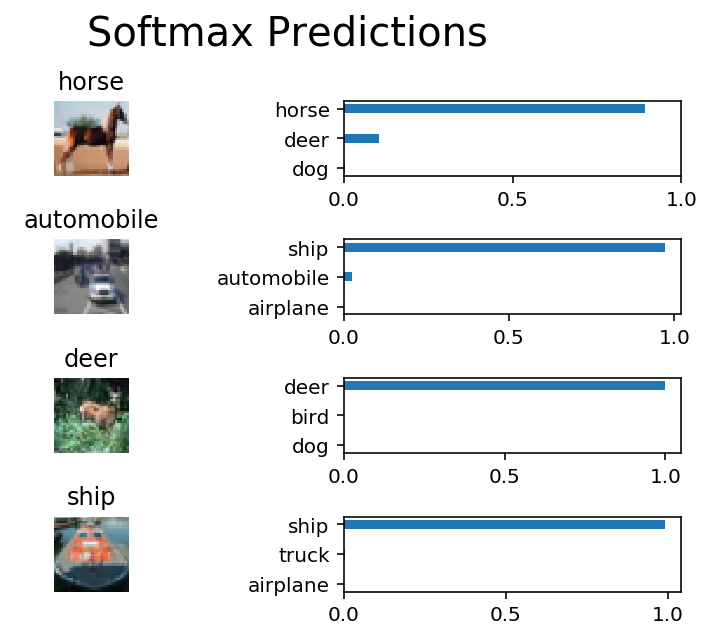

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.

## 为什么仅有 50%~ 80% 的准确率？

你也许会觉得奇怪，为什么你的准确率总是提高不上去。对于简单的 CNN 网络而言，50% 并非是很差的表现。纯粹的猜测只会得到 10% 的准确率（因为一共有 10 类）。这是因为还有许多许多能够应用到你模型的技巧。在你做完了该项目之后，你可以探索探索我们给你推荐的一些方法。


## 提交该项目

在提交项目前，请确保你在运行了所有的 cell 之后保存了项目。将项目储存为 "image_classification.ipynb" 并导出为一个 HTML 文件。你可以再菜单栏中选择 File -> Download as 进行导出。请将 "helper.py" 及  "problem_unittests.py" 文件也放在你的提交文件中。

finish!